# Baseball Salary Prediction with Regression and CART Models

<div style="border-radius:10px;
            border : black solid;
            background-color: #FFFFF;
            font-size:110%;
            text-align: left">

In this notebook, we will develop a machine learning model that can estimate the player's salary.

Before modelling , we will make the exploratory data analysis and feature engineering for its dataset.
    
### Source
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. This is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.
 <a id = "4"></a><br>

    
Descriptions of Variables:

* **AtBat**: Number of times at bat in 1986

* **Hits**: Number of hits in 1986

* **HmRun**: Number of home runs in 1986

* **Runs**: Number of runs in 1986

* **RBI**: Number of runs batted in in 1986

* **Walks**: Number of walks in 1986

* **Years**: Number of years in the major leagues

* **CAtBat**: Number of times at bat during his career

* **CHits**: Number of hits during his career

* **CHmRun**: Number of home runs during his career

* **CRuns**: Number of runs during his career

* **CRBI**: Number of runs batted in during his career

* **CWalks**: Number of walks during his career

* **League**: A factor with levels A and N indicating player's league at the end of 1986

* **Division**: A factor with levels E and W indicating player's division at the end of 1986

* **PutOuts**: Number of put outs in 1986

* **Assists**: Number of assists in 1986

* **Errors**: Number of errors in 1986

* **Salary**: 1987 annual salary on opening day in thousands of dollars

* **NewLeague**: A factor with levels A and N indicating player's league at the beginning of 1987

### References
Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning with applications in R, www.StatLearning.com, Springer-Verlag, New York
 <a id = "5"></a><br>
### Examples
summary(Hitters)

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#000099; color:white;"><strong>TABLE OF CONTENTS </strong></center></h1>
</div>
 
    
##### [1.Exploratory Data Analysis](#data_preprocessing)
* [Importing Libraries](#importing_libraries)<br>
* [Reading in a dataset](#reading_in_a_dataset)<br>
* [Categorical and Numerical Variable Analysis](#categorical_and_numerical_variable_analysis)<br>
* [Correlation](#correlation)<br>

##### [2.Data Processing and Feature Engineering](#develop_the_association_rule_learning)
* [Missing Values](#missing_values)
* [Outliers](#outliers)
* [Processing Encoding ](#processing_encoding)
* [Standardization for Numerical Variables](#standardization_for_numerical_variables)

##### [3.Modeling](#modeling)

* [Linear Regression](#linear_regression)
* [Ridge Regression](#ridge_regression)
* [Lasso Regression](#linear_regression)
* [LightGBM Model](#lightgbm_model)
* [Random Forest Model](#random_forest_model)

##### [4.Summary](#summary)

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#000099; color:white;"><strong>EXPLORATORY DATA ANALYSIS </strong></center></h1>
</div>

#### Importing Libraries
<a id="importing_libraries"></a>

In [89]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
#import missingno as msno
from datetime import date

# Modeling
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# Modeling
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


#### Reading in a dataset
<a id="reading_in_a_dataset"></a>

In [90]:
data = pd.read_csv("C:/Users/proje/PycharmProjects/pythonProject/Hitters.csv")
df = data.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


##### Checking the data

In [8]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    fl

#### Categorical and Numerical Variable Analysis
<a id="categorical_and_numerical_variable_analysis"></a>

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


League
A    175
N    147
Name: count, dtype: int64


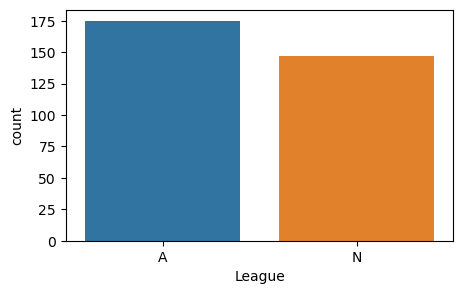

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Division
W    165
E    157
Name: count, dtype: int64


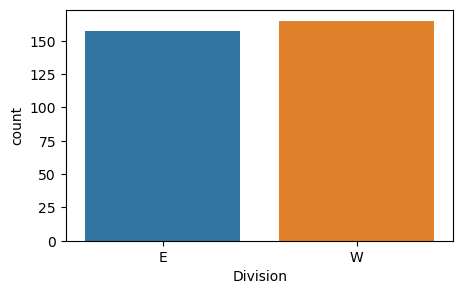

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
NewLeague
A    176
N    146
Name: count, dtype: int64


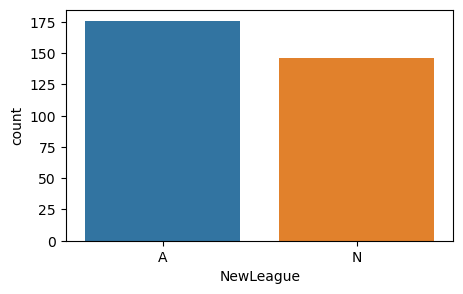

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


In [10]:
for i in cat_cols:
    
    print(df[i].value_counts())
    
    fig, ax = plt.subplots(figsize=(5,3))
    
    sns.countplot(x=df[i], data=df, ax=ax)
    
    plt.show()
    
    print("-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

#### Visualization of Numerical Variables

,count,mean,std,min,5%,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,161.00,194.1,221.8,281.3,321.8,379.5,430.2,490.0,535.6,584.9000,609.90,658.59000,687.0
Hits,322.0,101.024845,46.454741,1.0,39.00,45.1,57.0,70.0,82.0,96.0,113.0,128.7,144.0,163.0000,174.00,210.79000,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,1.0,3.0,5.0,6.0,8.0,10.6,14.0,18.0,24.0000,28.95,33.00000,40.0
Runs,322.0,50.909938,26.024095,0.0,17.00,20.1,27.0,33.0,41.0,48.0,55.6,66.0,75.8,89.0000,94.00,107.79000,130.0
RBI,322.0,48.027950,26.166895,0.0,14.00,19.0,26.0,30.0,36.4,44.0,49.0,58.0,73.0,86.0000,96.00,112.37000,121.0
Walks,322.0,38.742236,21.639327,0.0,11.05,15.0,20.0,24.0,30.0,35.0,40.0,48.7,59.0,69.9000,78.00,93.58000,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,2.0,3.0,4.0,5.0,6.0,7.6,10.0,12.0,15.0000,17.00,19.79000,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,216.50,342.2,667.6,963.4,1402.2,1928.0,2654.0,3365.0,4483.0,6123.4000,7125.60,8749.97000,14053.0
CHits,322.0,717.571429,654.472627,4.0,54.00,86.0,164.6,238.0,355.8,508.0,708.2,911.1,1229.2,1659.6000,2017.15,2500.34000,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,2.00,4.0,10.2,16.3,27.4,37.5,51.2,72.4,103.8,194.9000,265.65,373.12000,548.0


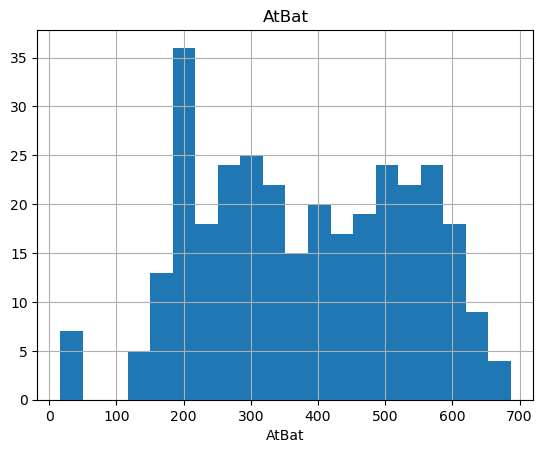

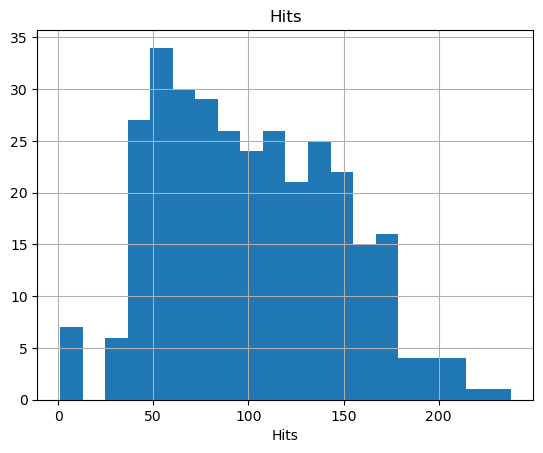

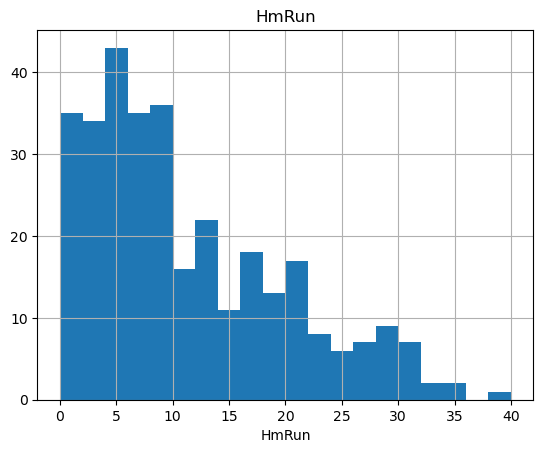

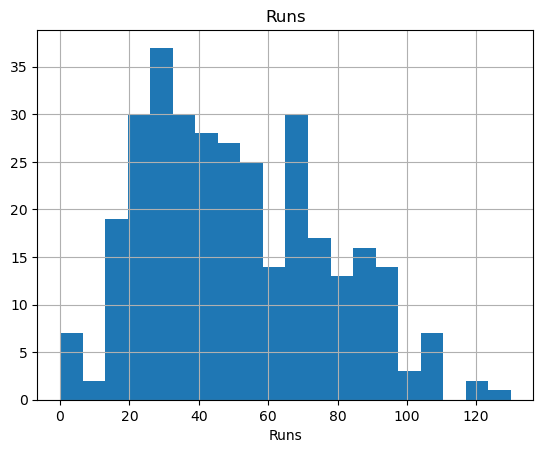

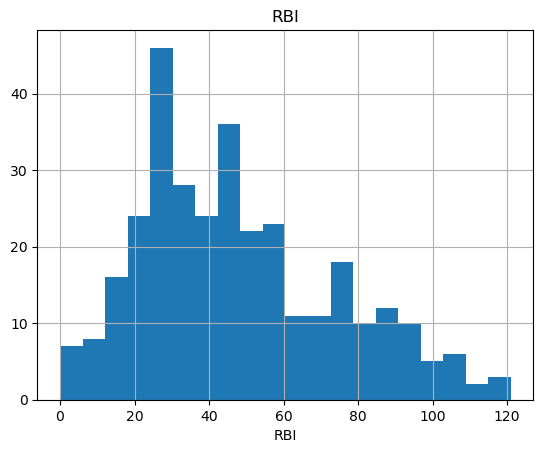

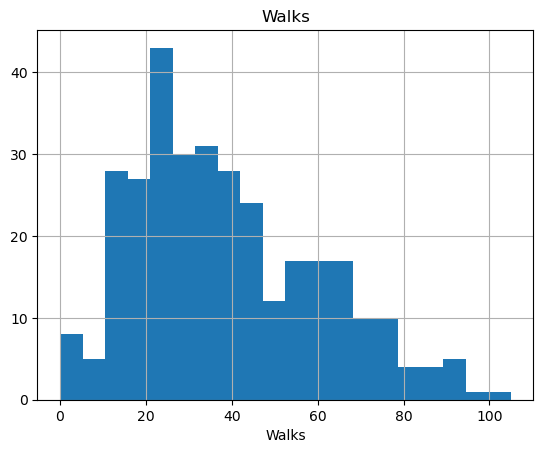

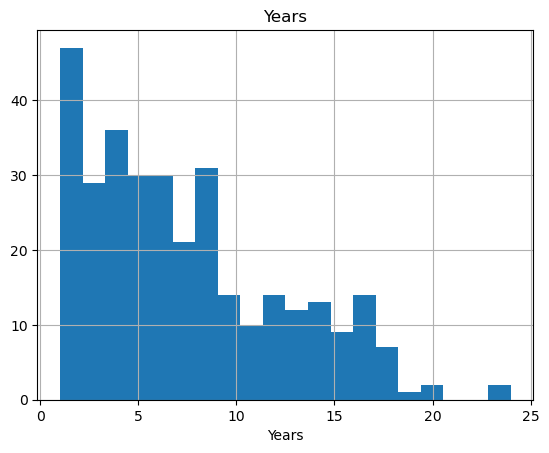

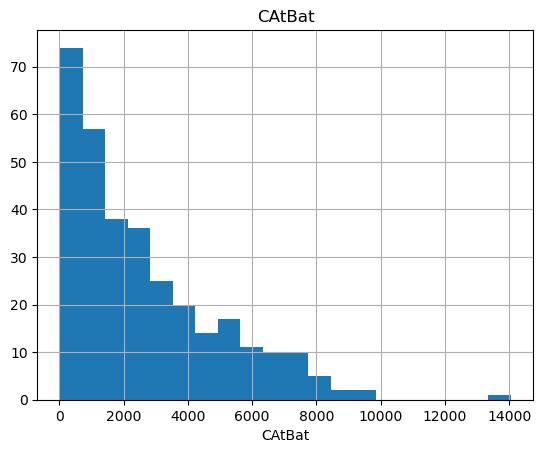

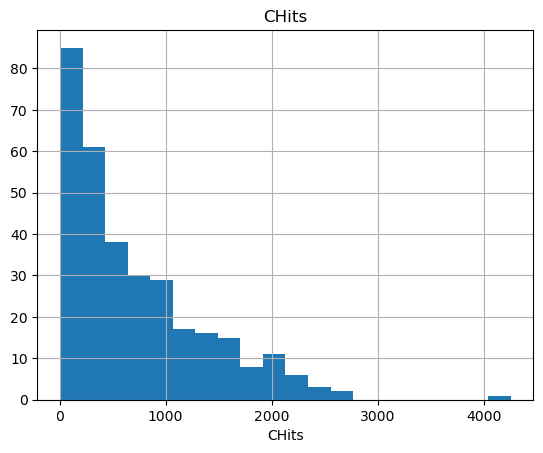

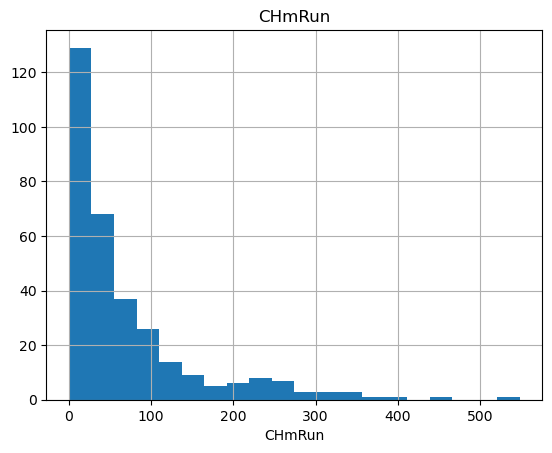

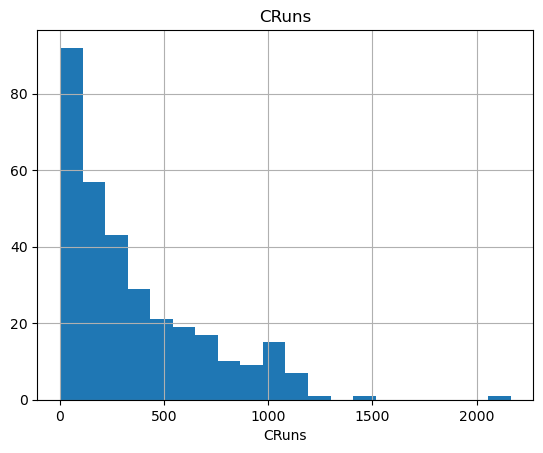

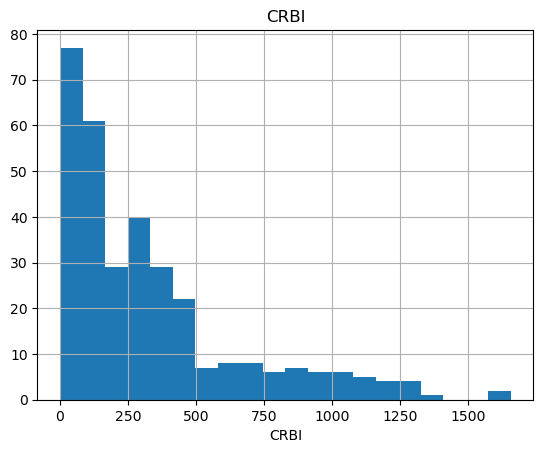

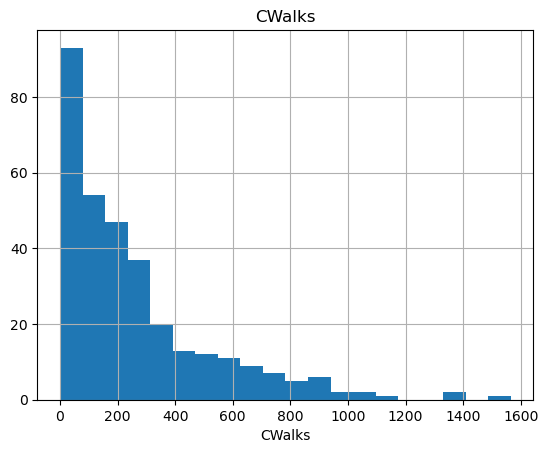

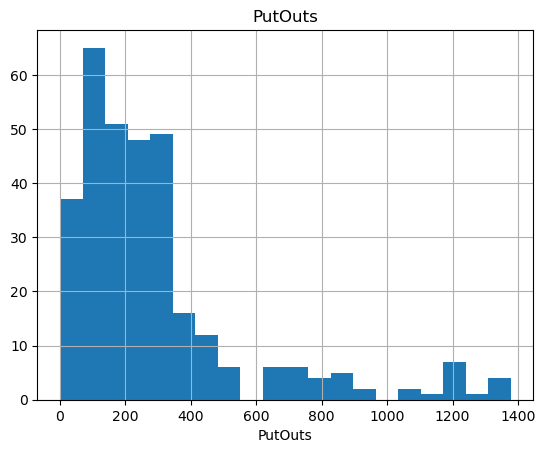

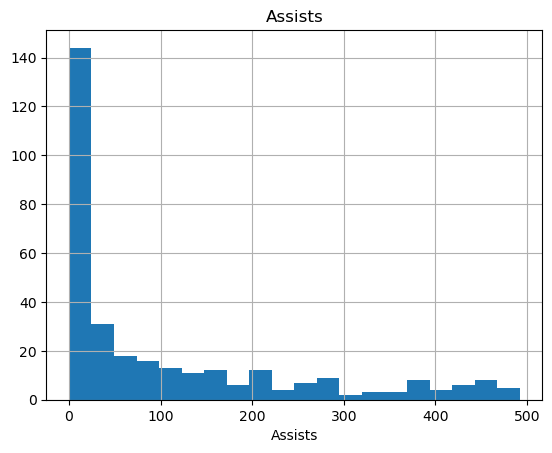

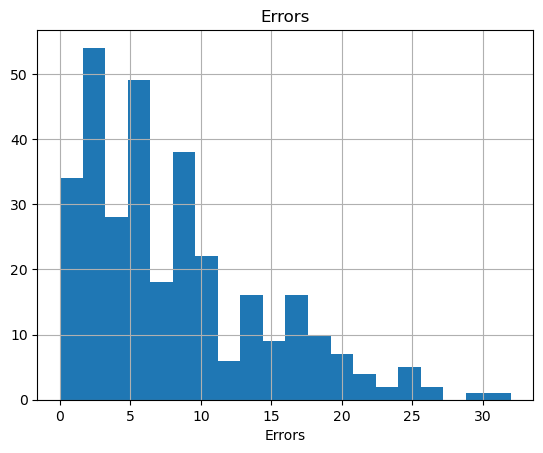

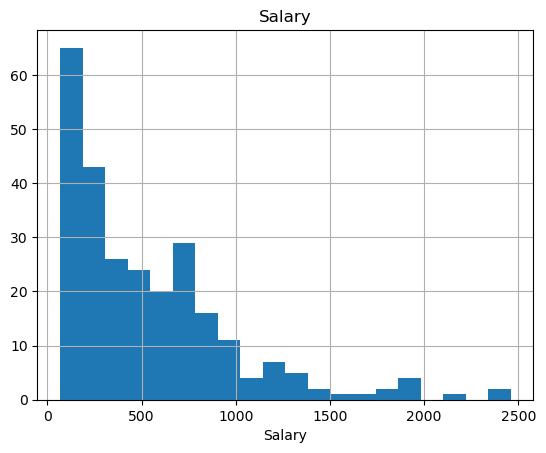

In [11]:
quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
display(df.describe(quantiles).T)

for i in num_cols:
    
    df[i].hist(bins=20)
    plt.xlabel(i)
    plt.title(i)
    plt.show()

#### Target Summary with Categorical variables

In [12]:
def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"Salary Mean": dataframe.groupby(categorical_col)[target].mean()}))
    print("************")

for col in cat_cols:
    target_summary_with_cat(df,"Salary",col)

        Salary Mean
League             
A        541.999547
N        529.117500
************
          Salary Mean
Division             
E          624.271364
W          450.876873
************
           Salary Mean
NewLeague             
A           537.113028
N           534.553852
************


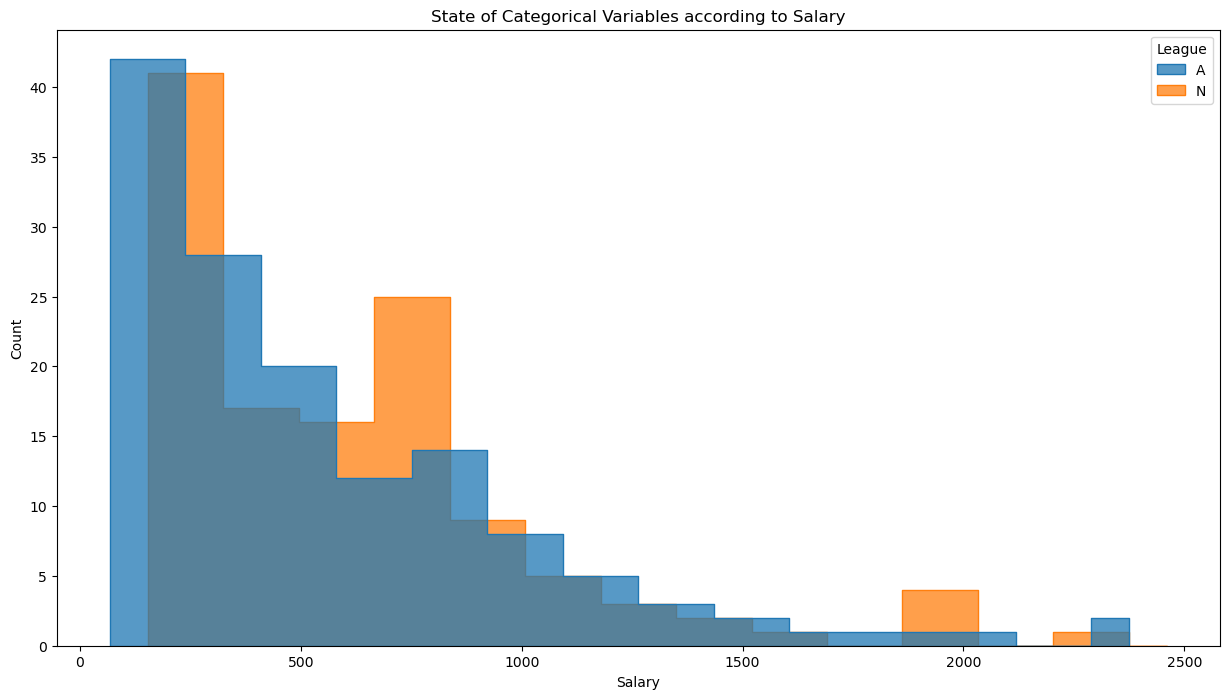

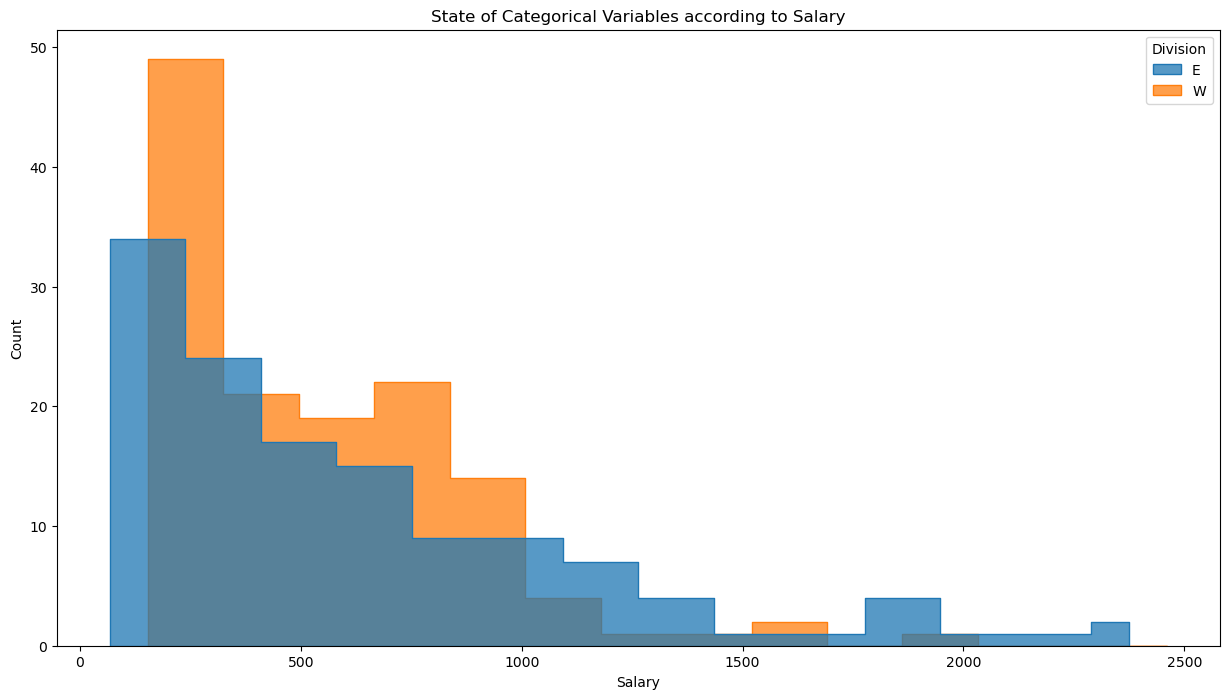

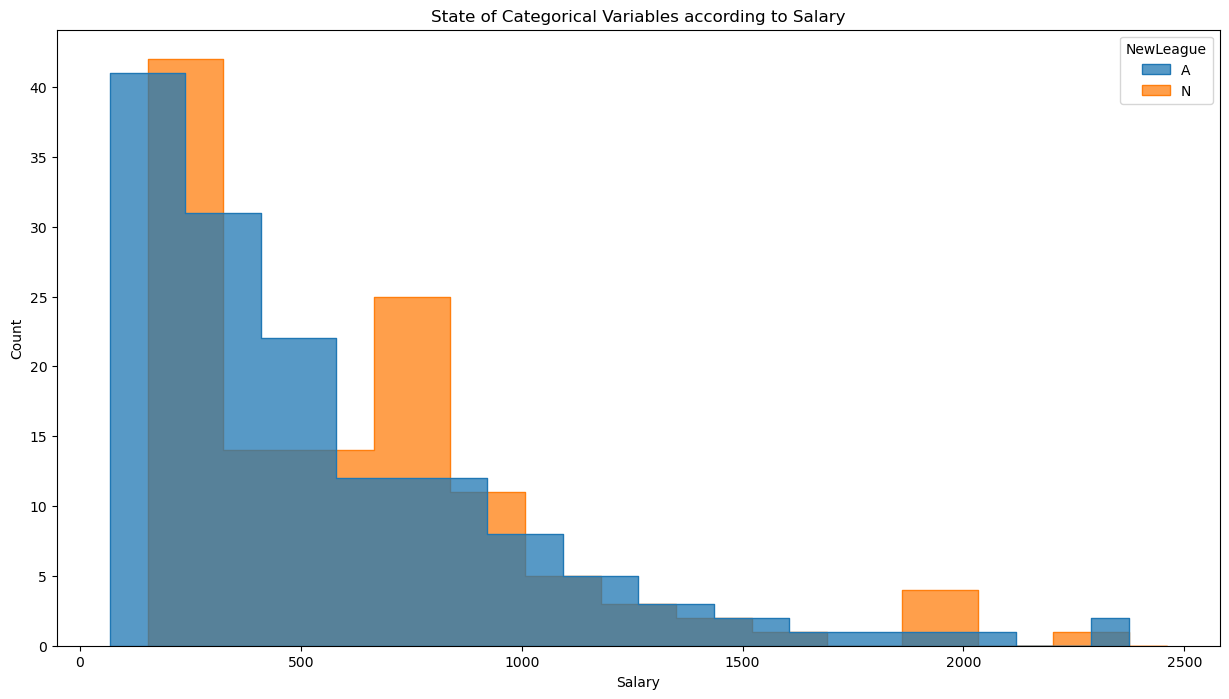

In [13]:
def target_vs_category_visual(dataframe,target, categorical_col):
    plt.figure(figsize=(15,8))
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title("State of Categorical Variables according to Salary")
    plt.show()

for col in cat_cols:
    target_vs_category_visual(df,"Salary",col)

### Correlation
<a id="correlation"></a>

In [9]:
df.corr(method="spearman")

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.974957,0.574885,0.926394,0.840804,0.702646,0.087678,0.352585,0.370240,0.356546,0.391289,0.375994,0.315708,0.371384,0.280444,0.367313,0.445898
Hits,0.974957,1.000000,0.567018,0.932100,0.844988,0.692841,0.109848,0.369063,0.394028,0.365293,0.410378,0.394967,0.332922,0.343660,0.255059,0.332895,0.479402
HmRun,0.574885,0.567018,1.000000,0.627421,0.816991,0.502599,0.177820,0.316849,0.324399,0.673064,0.354155,0.456604,0.332494,0.211825,-0.113090,0.040987,0.366712
Runs,0.926394,0.932100,0.627421,1.000000,0.821243,0.757086,0.068014,0.321061,0.341695,0.365951,0.388362,0.351974,0.330211,0.306796,0.169556,0.281916,0.440519
RBI,0.840804,0.844988,0.816991,0.821243,1.000000,0.673524,0.191363,0.399535,0.413994,0.581941,0.433179,0.508173,0.392293,0.298028,0.103392,0.224275,0.474357
Walks,0.702646,0.692841,0.502599,0.757086,0.673524,1.000000,0.175829,0.366268,0.372546,0.423113,0.413529,0.410561,0.511731,0.305666,0.127664,0.179976,0.439924
Years,0.087678,0.109848,0.177820,0.068014,0.191363,0.175829,1.000000,0.909378,0.899673,0.750359,0.881170,0.879920,0.871623,-0.045981,-0.044073,-0.141665,0.625742
CAtBat,0.352585,0.369063,0.316849,0.321061,0.399535,0.366268,0.909378,1.000000,0.997674,0.838267,0.989216,0.971379,0.950278,0.051359,0.049362,-0.016744,0.749572
CHits,0.370240,0.394028,0.324399,0.341695,0.413994,0.372546,0.899673,0.997674,1.000000,0.836281,0.990809,0.971063,0.946025,0.054113,0.042679,-0.019964,0.759409
CHmRun,0.356546,0.365293,0.673064,0.365951,0.581941,0.423113,0.750359,0.838267,0.836281,1.000000,0.846641,0.924856,0.833176,0.101002,-0.129077,-0.095720,0.670759


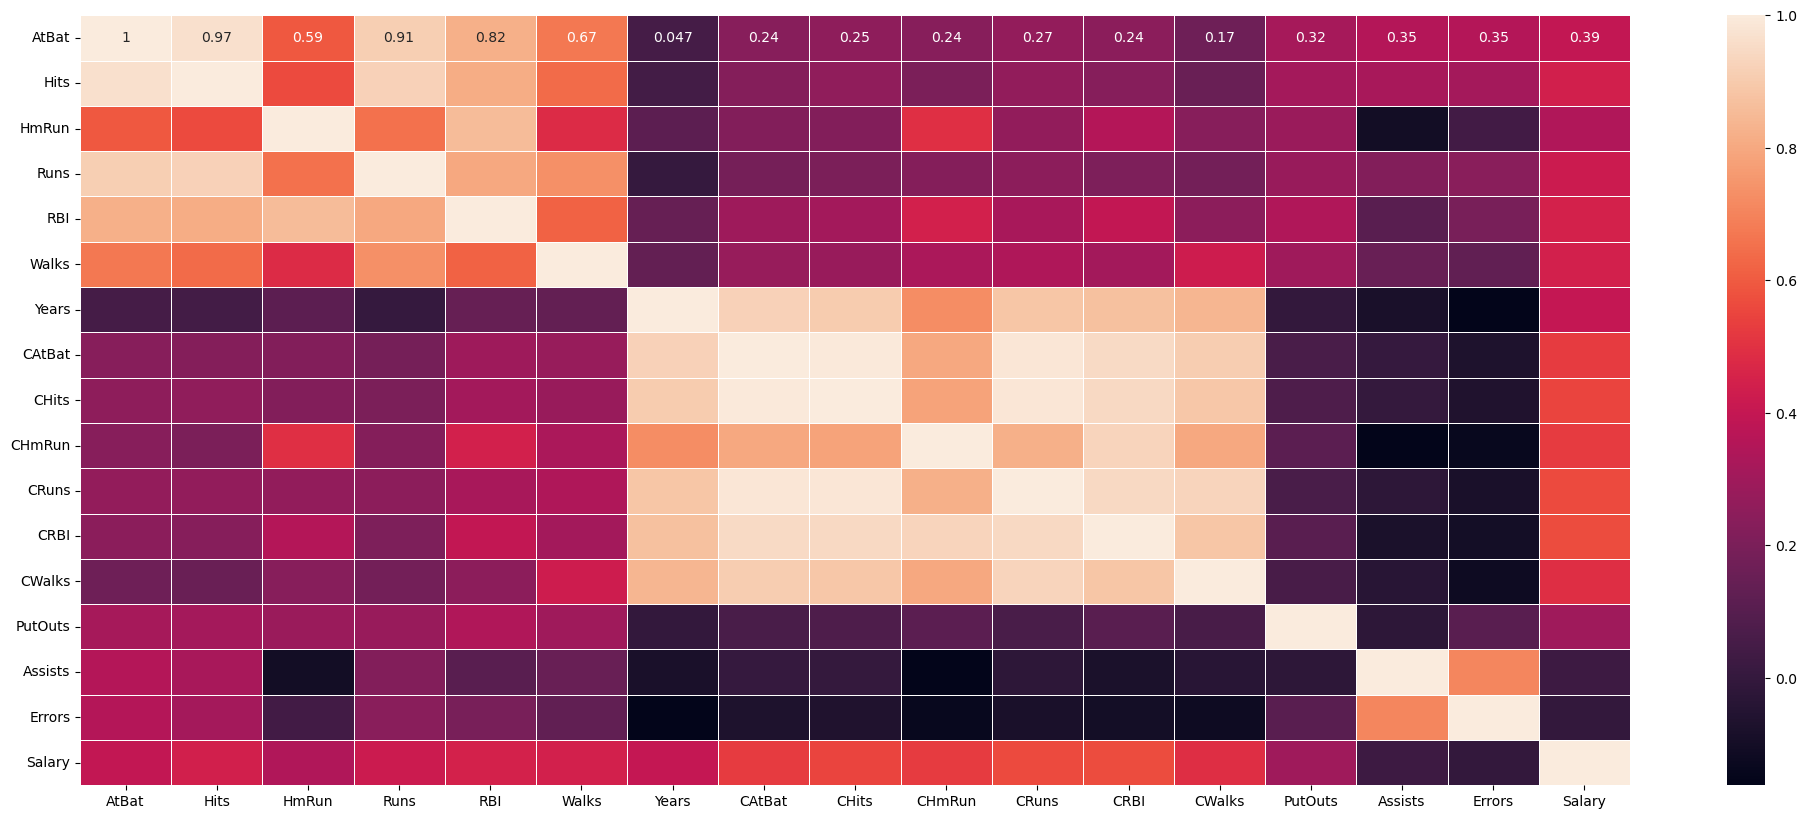

In [15]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#000099; color:white;"><strong>DATA PREPROCESSING & FEATURE ENGINEERING </strong></center></h1>
</div>

## 2.1. Data Prepocessing (Threshold Low Limit %25 - Up Limit %75 and Fill the NaN Values with knn method)

In this section, we will determine the threshold limit values of the numerical variables as 25/75 the limit values and to fill the NaN values with knn method.

In [16]:
df1 = df.copy()

<font color = '#F1C40F'>

<a id = "10"></a><br>
### Missing Values
<a id="missing_values"></a>

In [17]:
missings = df1.isna().sum()
missing_df1 = (pd.concat([missings.rename('Missing Values'),
                     missings.div(len(df)).rename('Missing ratio')],axis = 1)
                                           .loc[missings.ne(0)])
missing_df1

,Missing Values,Missing ratio
Salary,59,0.18323


**Comment :**

As we can see above the dataset's Salary variable has 59 NaN values. This values will be filled with knn method.

In [18]:
dff = pd.get_dummies(df1[cat_cols + num_cols], drop_first=True)


In [19]:
scaler = RobustScaler()
dff = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)


In [20]:
imputer = KNNImputer(n_neighbors=5)
dff=pd.DataFrame(imputer.fit_transform(dff), columns=dff.columns)
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,-0.336904,-0.410959,-0.583333,-0.464516,-0.408163,-0.677419,-0.714286,-0.526146,-0.519847,-0.480263,-0.509390,-0.567407,-0.575368,1.084589,-0.040881,1.750,-0.593036,0.0,-1.0,0.0
1,-0.251217,-0.205479,-0.083333,-0.619355,-0.163265,0.129032,1.142857,0.489461,0.384593,0.414474,0.173709,0.573333,0.751838,1.946698,0.022013,0.500,0.089286,1.0,0.0,1.0
2,0.387537,0.465753,0.833333,0.464516,0.761905,1.322581,-0.428571,-0.097828,-0.059982,0.335526,-0.053991,0.134815,0.340074,3.096176,0.267296,1.000,0.098214,0.0,0.0,0.0
3,0.453749,0.616438,1.000000,0.438710,0.925170,0.064516,0.714286,1.190668,1.254925,2.467105,1.363850,1.829630,0.674632,-0.055620,-0.179245,-0.375,0.133929,1.0,-1.0,1.0
4,-0.227848,-0.123288,0.166667,-0.232258,-0.054422,-0.161290,-0.571429,-0.493001,-0.478683,-0.335526,-0.467136,-0.517037,-0.505515,2.748552,0.003145,-0.250,-0.595536,1.0,-1.0,1.0


In [21]:
dff = pd.DataFrame(scaler.inverse_transform(dff), columns=dff.columns)

In [22]:
df1=dff
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,92.9,0.0,0.0,0.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.0,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.0,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.0,1.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.5,1.0,0.0,1.0


In [23]:
df1.isnull().sum()

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

<font color = '#F1C40F'>

<a id = "10"></a><br>
### Outliers
<a id="outliers"></a>

In [24]:
# Descriptive Analysis
df1.describe([0.05,0.25,0.50,0.75,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,161.000,255.25,379.5,512.000,609.90,658.59,687.0
Hits,322.0,101.024845,46.454741,1.0,39.000,64.00,96.0,137.000,174.00,210.79,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.000,4.00,8.0,16.000,28.95,33.00,40.0
Runs,322.0,50.909938,26.024095,0.0,17.000,30.25,48.0,69.000,94.00,107.79,130.0
RBI,322.0,48.027950,26.166895,0.0,14.000,28.00,44.0,64.750,96.00,112.37,121.0
Walks,322.0,38.742236,21.639327,0.0,11.050,22.00,35.0,53.000,78.00,93.58,105.0
Years,322.0,7.444099,4.926087,1.0,1.000,4.00,6.0,11.000,17.00,19.79,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,216.500,816.75,1928.0,3924.250,7125.60,8749.97,14053.0
CHits,322.0,717.571429,654.472627,4.0,54.000,209.00,508.0,1059.250,2017.15,2500.34,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,2.000,14.00,37.5,90.000,265.65,373.12,548.0


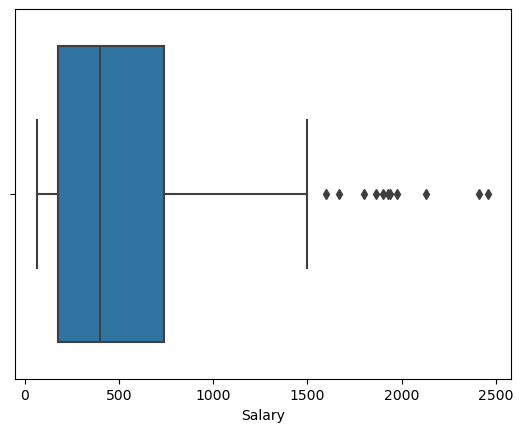

In [25]:
sns.boxplot(x = df1["Salary"])
plt.show()

Now we put outlier thresholds and check for outliers in the dataset based on 25/75 thresholds.

Define a Function about outlier threshold for data columns

In [26]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [27]:
# Threshold values are determined for the target variable. 
    
low_limit,up_limit = outlier_thresholds(df1, "Salary")
print("Low Limit : {0}  Up Limit : {1}".format(low_limit,up_limit))

Low Limit : -670.6874999999999  Up Limit : 1585.4125


Define a Function about checking outlier for data columns


In [28]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Define a Function about replace with threshold for data columns


In [29]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [30]:
for col in num_cols:
    print(col, check_outlier(df1, col))

AtBat False
Hits False
HmRun True
Runs True
RBI True
Walks True
Years True
CAtBat True
CHits True
CHmRun True
CRuns True
CRBI True
CWalks True
PutOuts True
Assists True
Errors True
Salary True


In [31]:
for col in num_cols:
    replace_with_thresholds(df1, col)

In [32]:
for col in num_cols:
    print(col, check_outlier(df1, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


Comment :

As you can see, there were outliers for some variables, so we replaced above thresholds for these variables


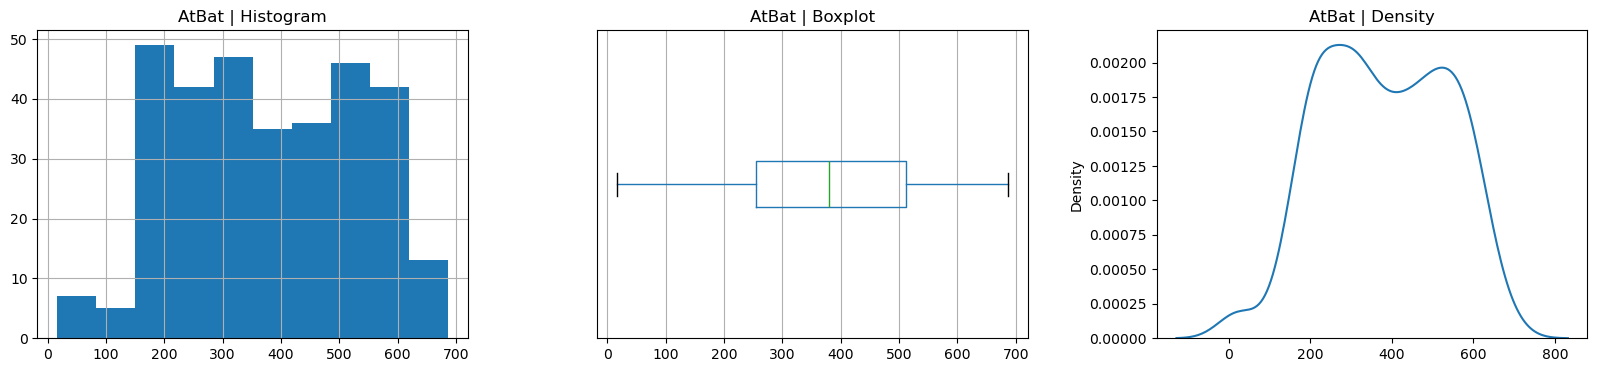

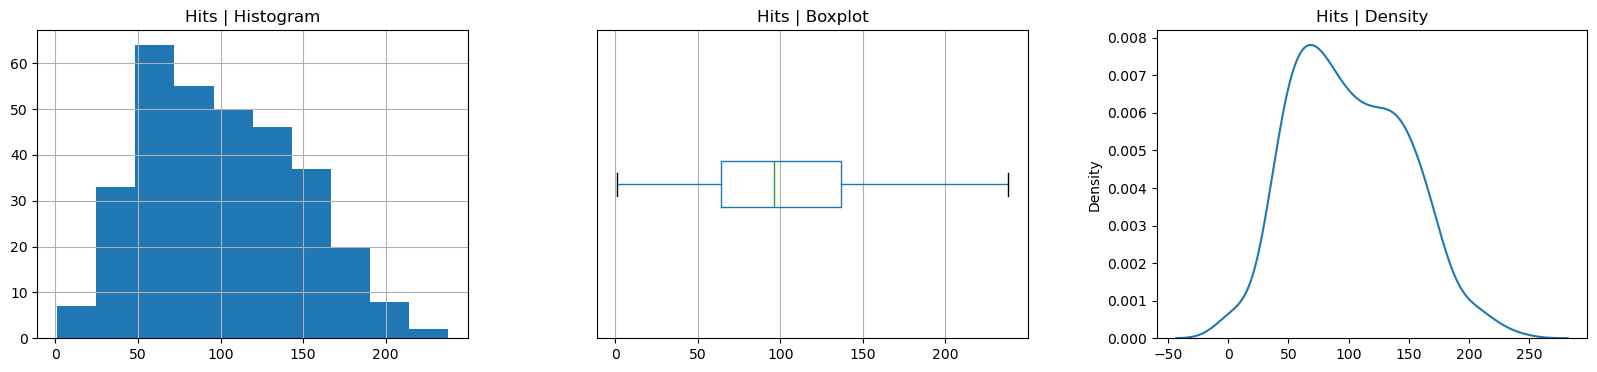

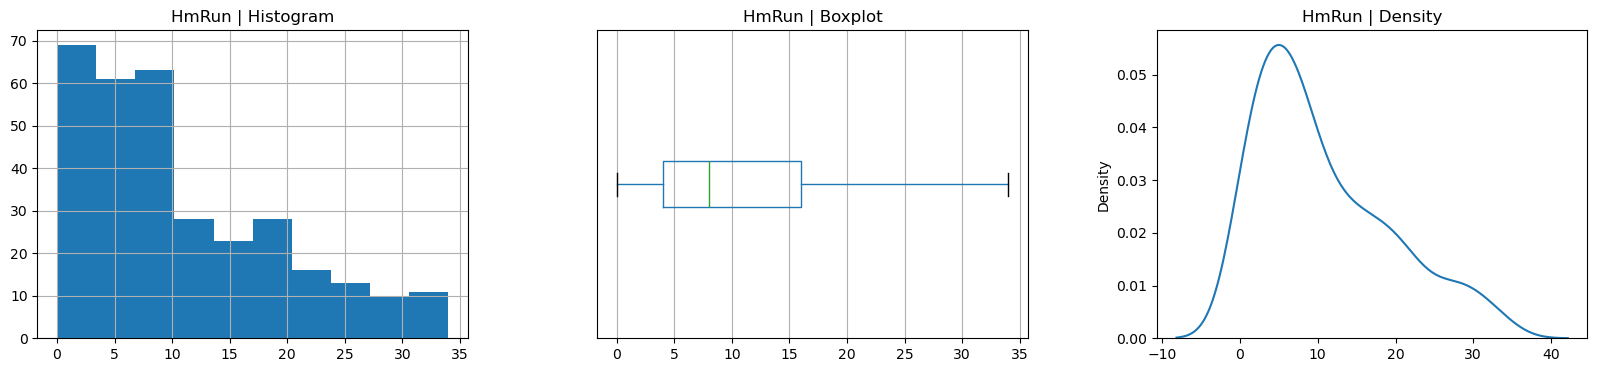

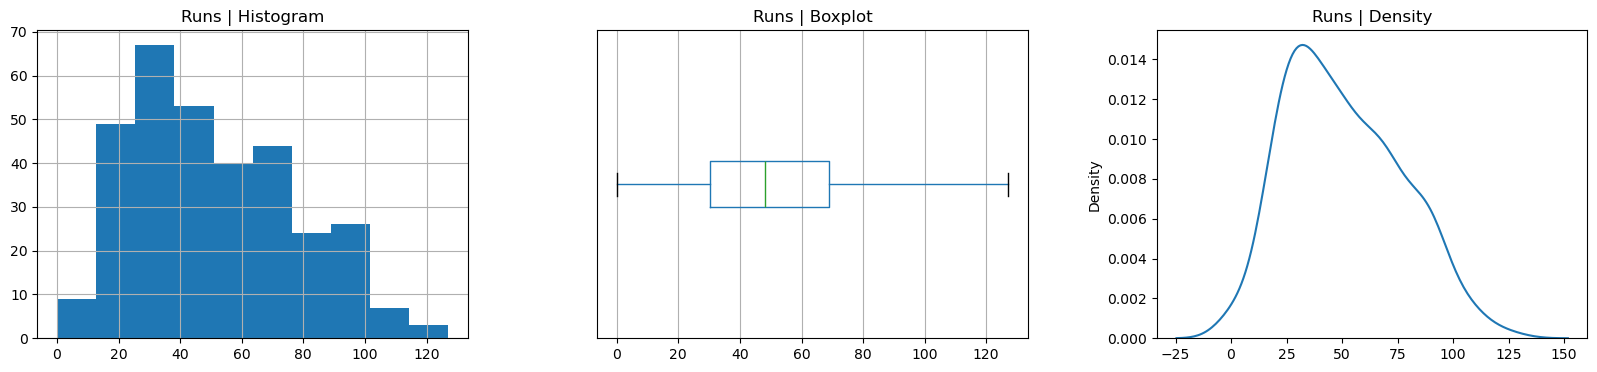

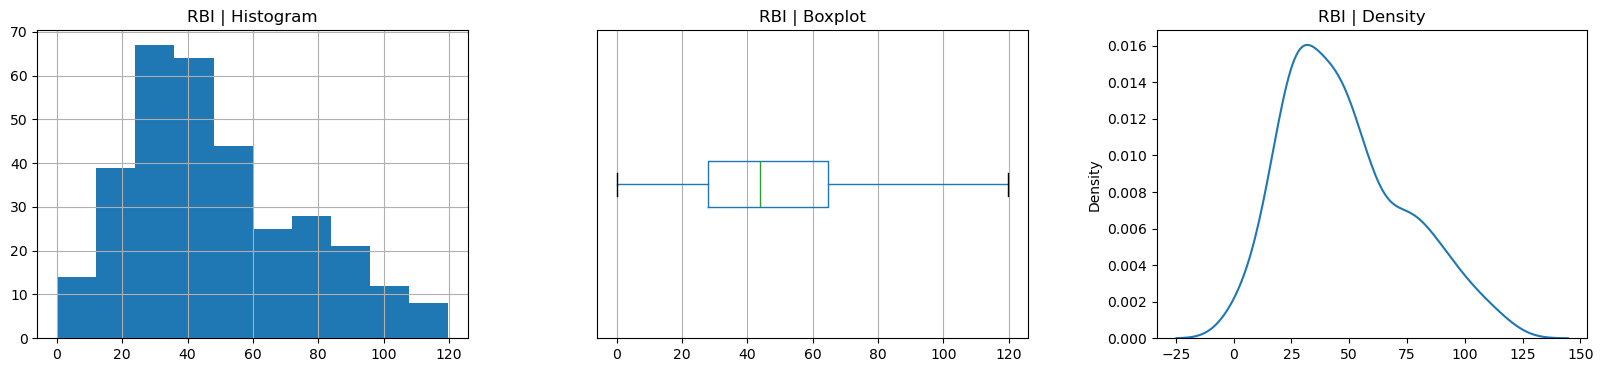

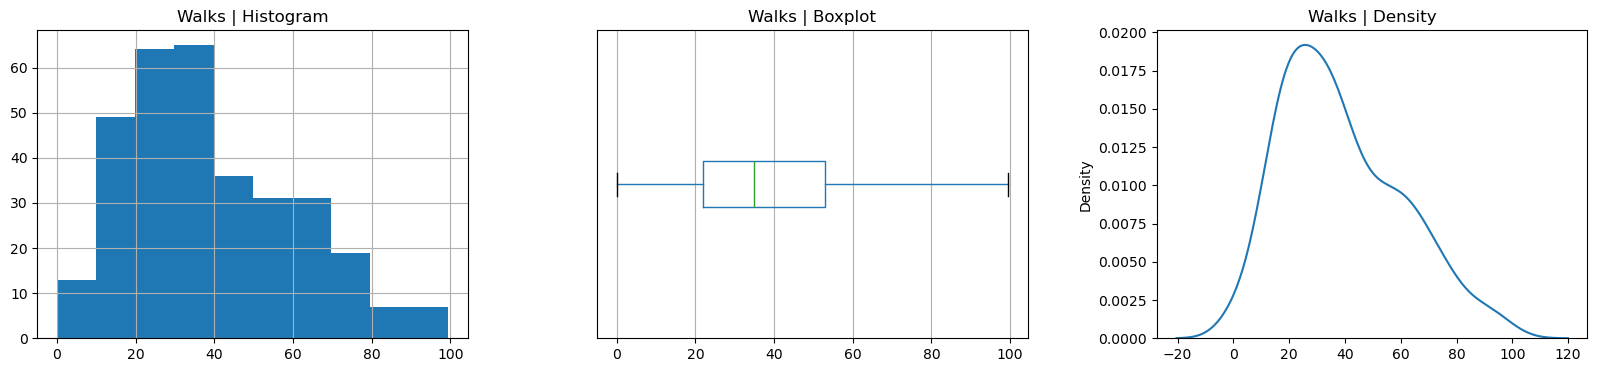

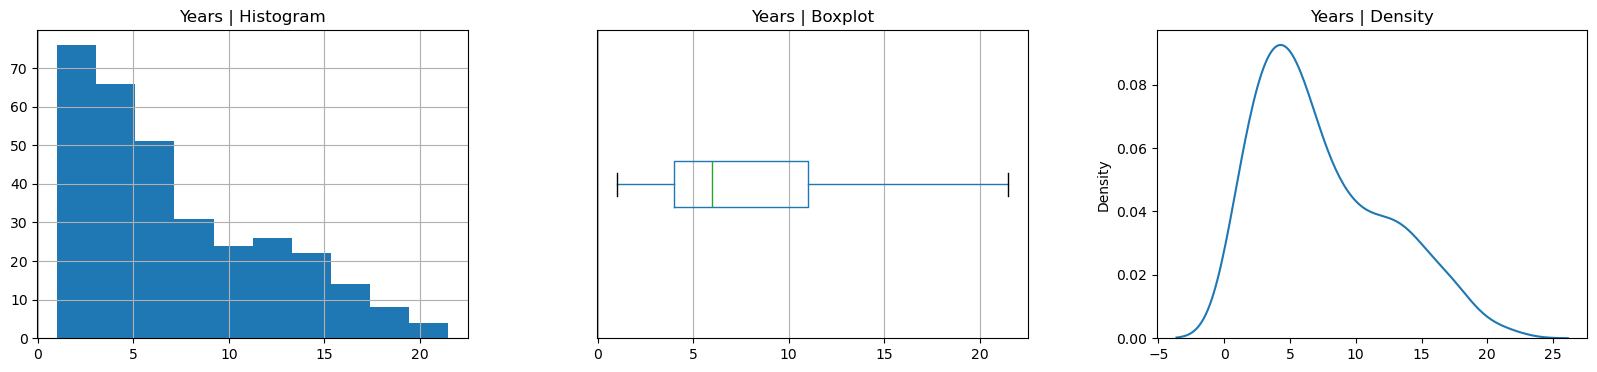

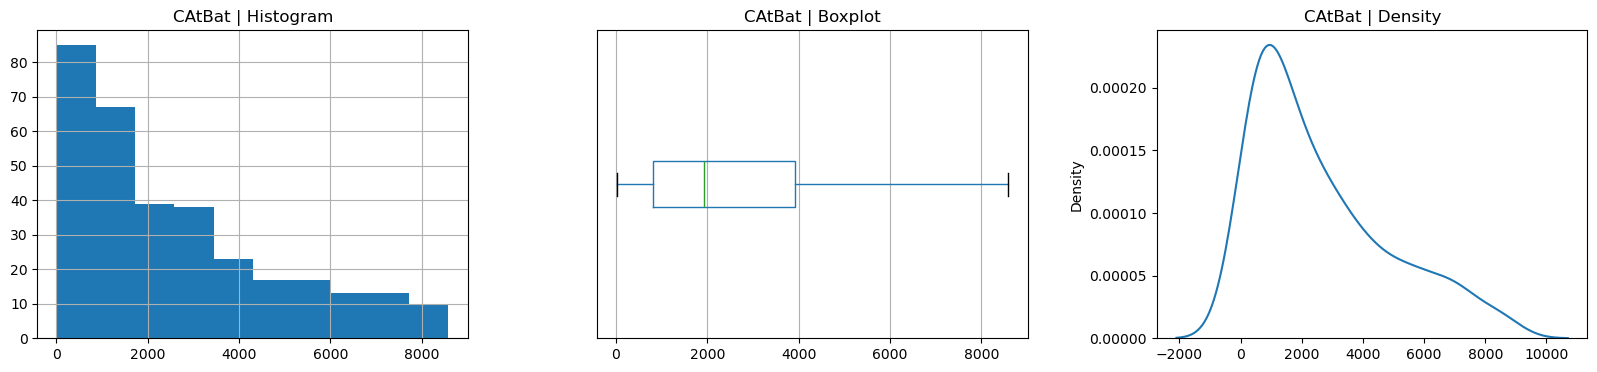

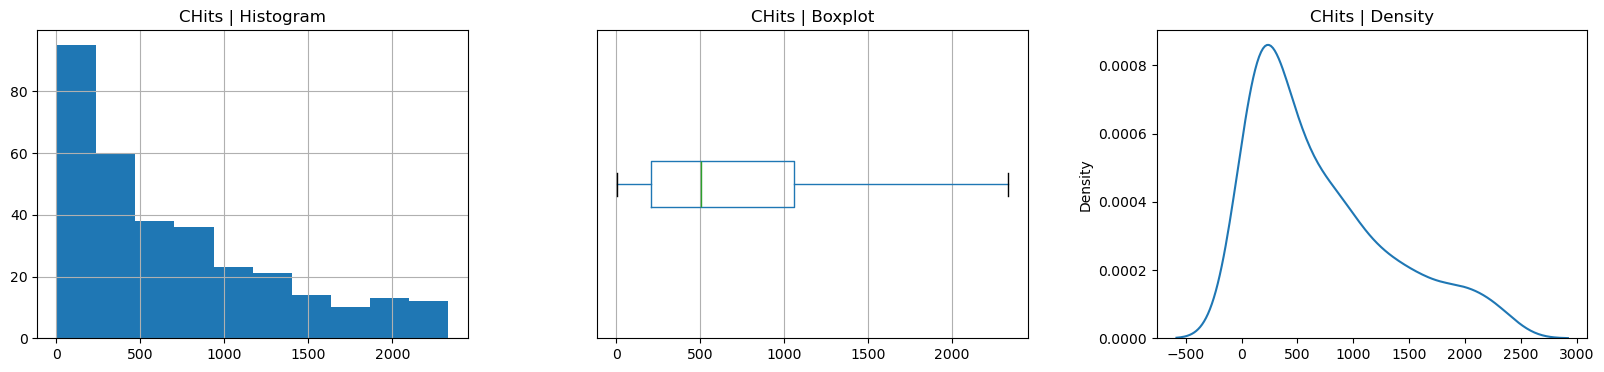

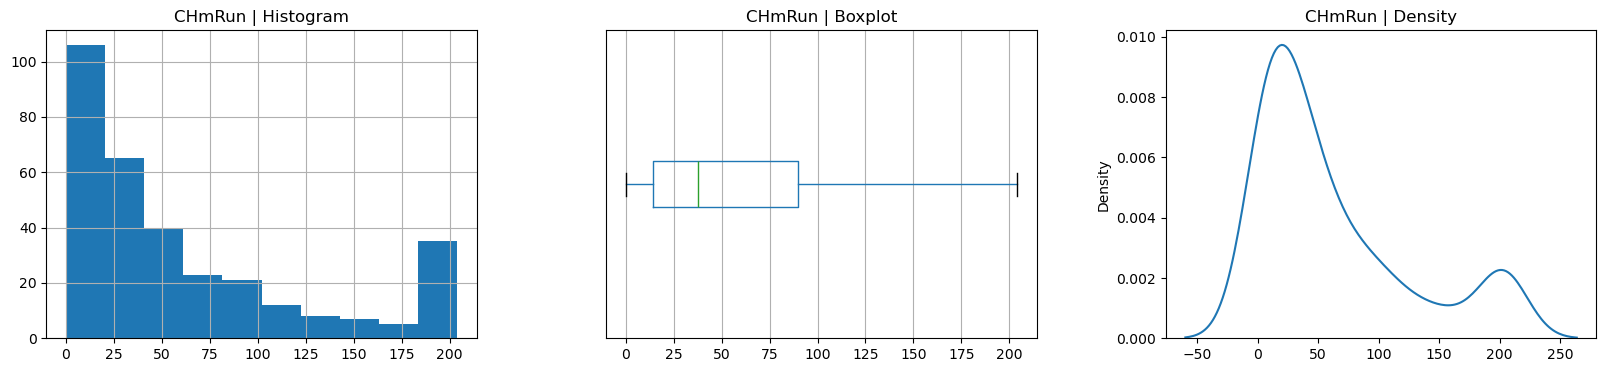

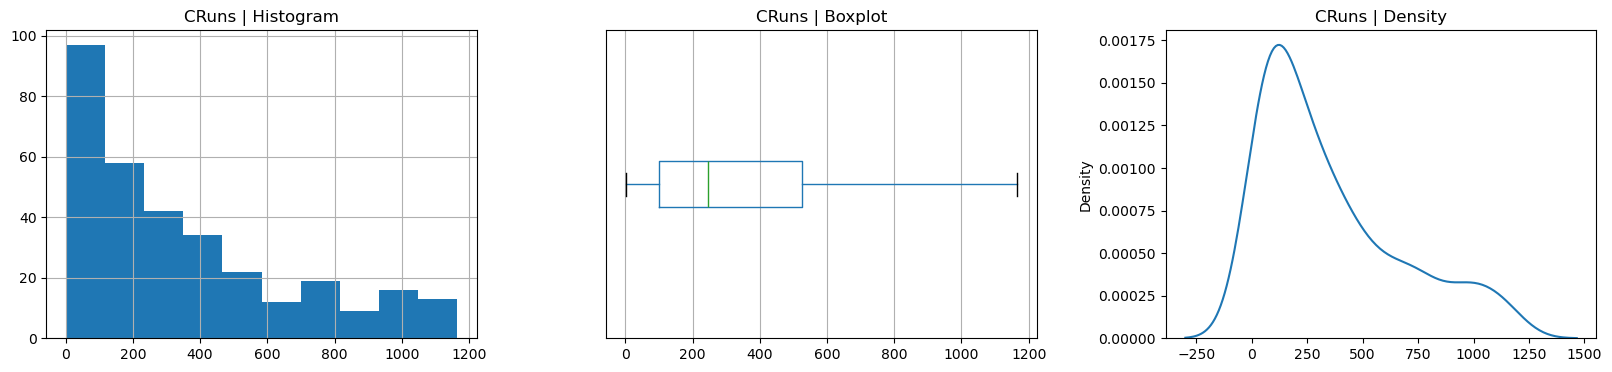

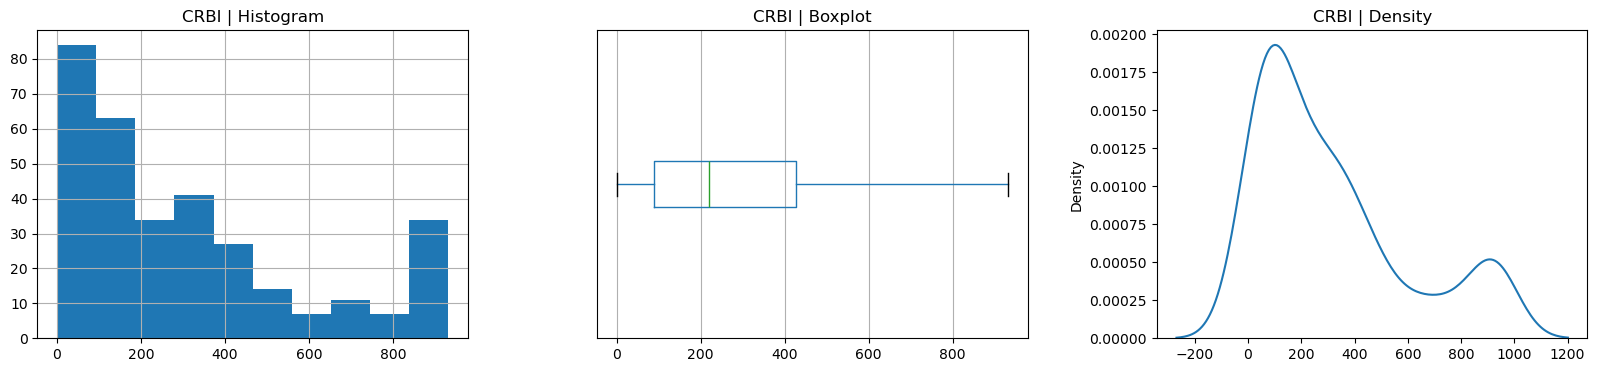

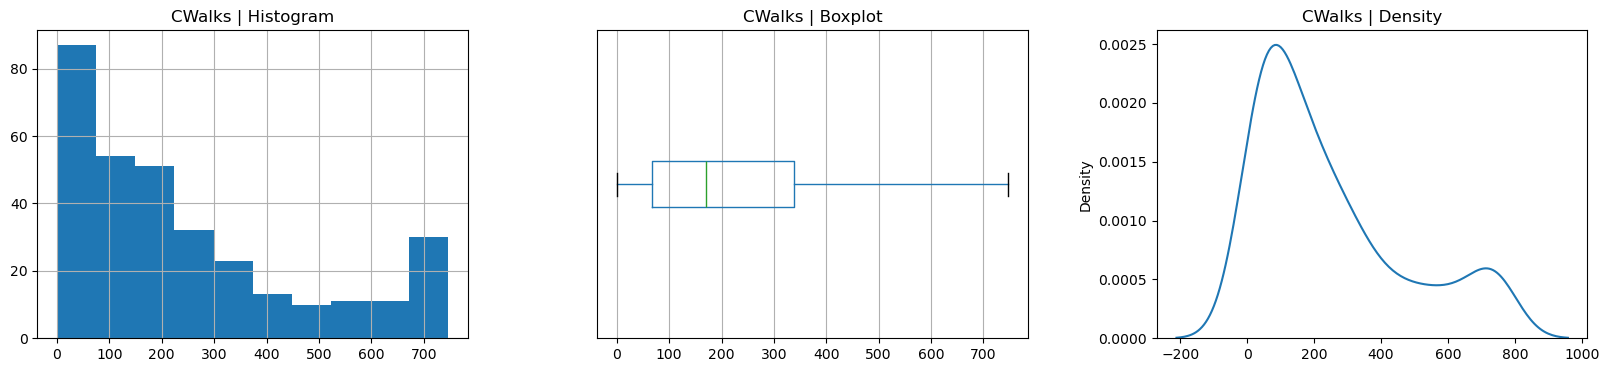

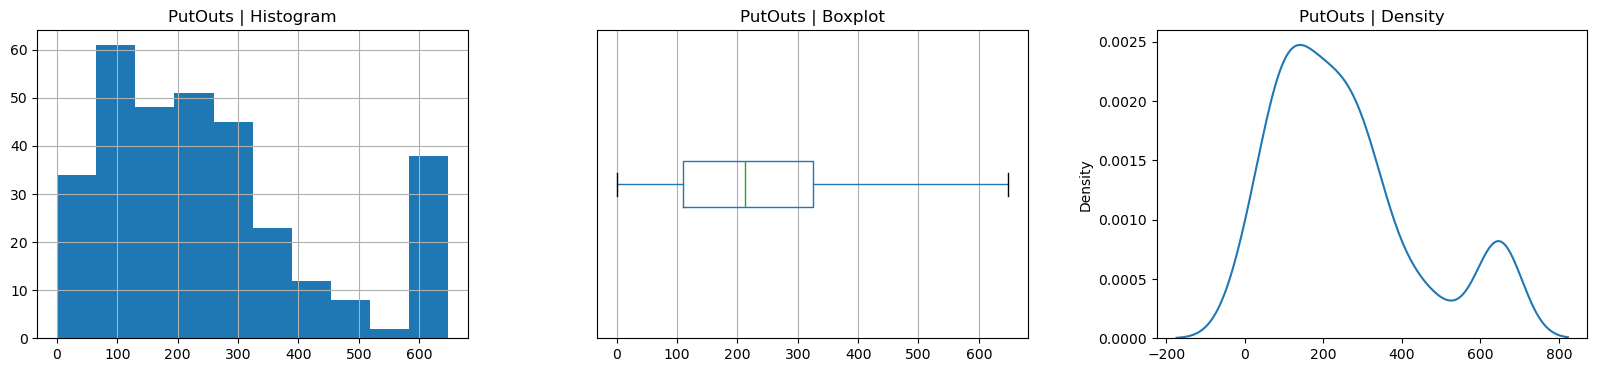

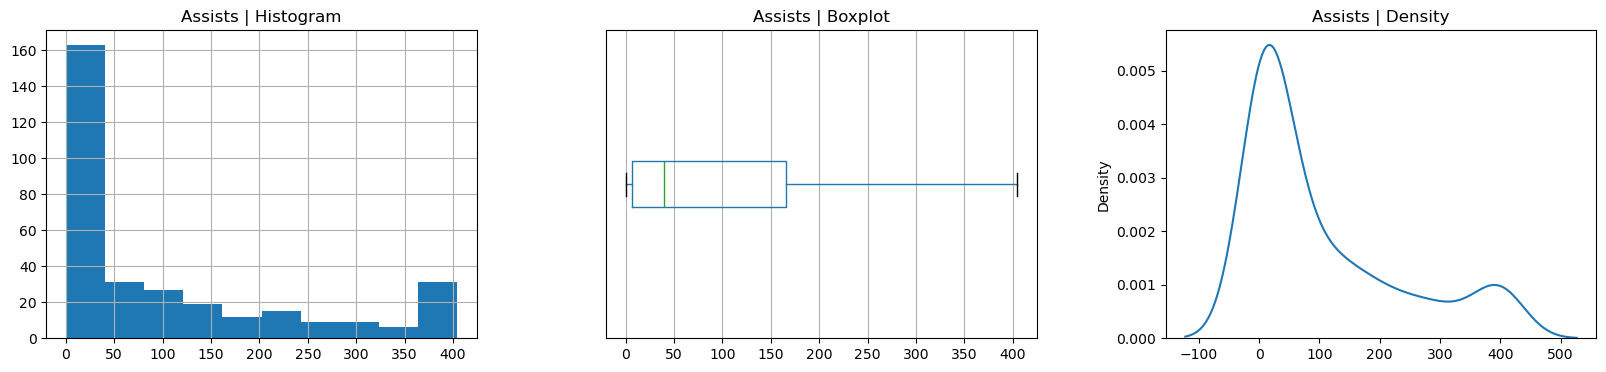

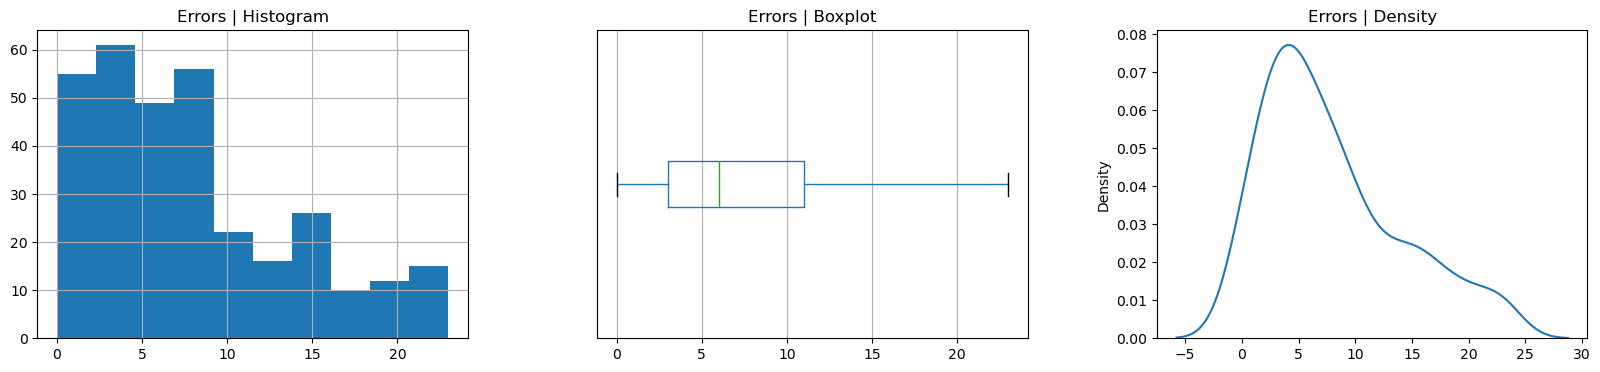

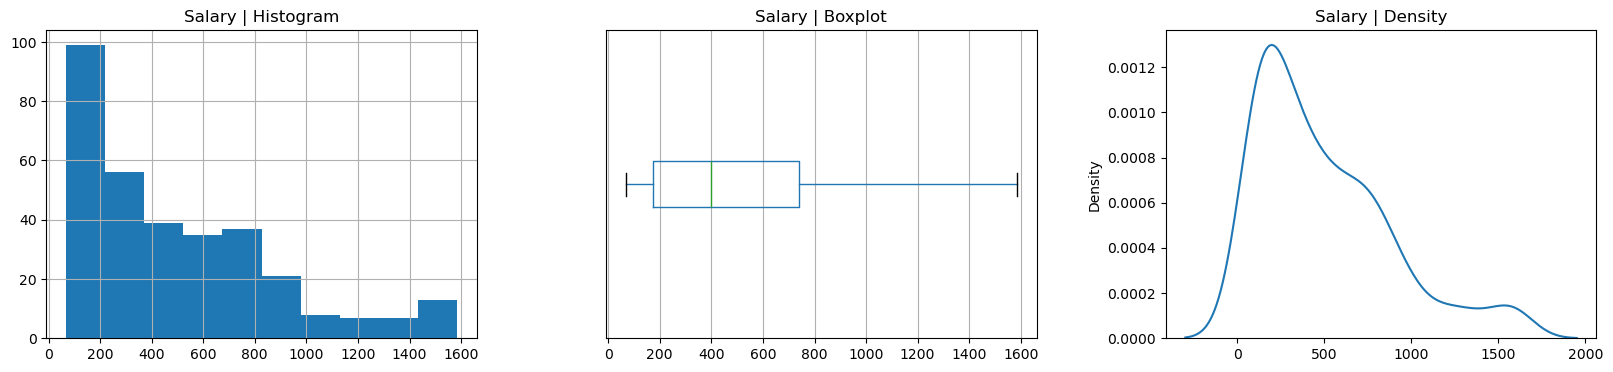

In [33]:
def num_plot(df, cat_length = 10, remove = ["Id"], hist_bins = 10, figsize = (17,4)):
    
    num_col = [col for col in df.columns if df1[col].dtypes != "O" 
                and len(df1[col].unique()) >= cat_length]
    
    if len(remove) > 0:
        num_col = [x for x in num_col if (x not in remove)]
           
    for i in num_col:
        fig, axes = plt.subplots(1, 3, figsize = figsize)
        df1.hist(str(i), bins = hist_bins, ax=axes[0])
        df1.boxplot(str(i),  ax=axes[1], vert=False);
        try: 
            sns.kdeplot(np.array(df1[str(i)]))
        except: ValueError
        
        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()
        
        
num_plot(df1, cat_length = 16, remove = ["Id"], hist_bins = 10, figsize = (20,4))

<font color = '#F1C40F'>

<a id = "10"></a><br>
## 2.2.Feature Engineering
<a id="feature_engineering"></a>

In [34]:
# Correlation analysis of numerical variables was performed.

def find_correlation(dataframe, numeric_cols, corr_limit=0.60):
    high_correlations = []
    low_correlations = []
    for col in numeric_cols:
        if col == "Salary":
            pass
        else:
            correlation = dataframe[[col, "Salary"]].corr().loc[col, "Salary"]
            print(col, correlation)
            if abs(correlation) > corr_limit:
                high_correlations.append(col + ": " + str(correlation))
            else:
                low_correlations.append(col + ": " + str(correlation))
    return low_correlations, high_correlations


low_corrs, high_corrs = find_correlation(df, num_cols)

AtBat 0.39477094475973734
Hits 0.4386747378694112
HmRun 0.34302807815466363
Runs 0.4198585593019815
RBI 0.4494570879400337
Walks 0.44386726016297945
Years 0.40065699438268604
CAtBat 0.5261353096237892
CHits 0.5489095590351705
CHmRun 0.5249305595435935
CRuns 0.5626777110048051
CRBI 0.5669656856176524
CWalks 0.48982203628068005
PutOuts 0.30048035550600516
Assists 0.025436135647346703
Errors -0.005400701500953135


<font color = '#F1C40F'>

 <a id = "11"></a><br>
### New Variables
<a id="new_variables"></a>

It's time to create new variables (Feature Engineering) to rise the accuracy of the regression models

I have created 11 new variables below by using already existing variables.

In [31]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.000,33.0,20.0,92.9,0.0,0.0,0.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.000,43.0,10.0,475.0,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,648.625,82.0,14.0,480.0,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,204.0,828.0,838.0,354.0,200.000,11.0,3.0,500.0,1.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,648.625,40.0,4.0,91.5,1.0,0.0,1.0


In [35]:
#Batting Average
df1["HITS_SUCCESS"]= df1['Hits']/df1['AtBat']
# HmRun/AtBat - Perfect hits per hits in 1986-1987 season

df1["HMRUN_ATBAT"] = df1["HmRun"] / df1["AtBat"] * 100


df1["RUN_SUCCESS"]= df1['HmRun']/(df1['Runs'] + 0.00001)
df1["HMRUN_RATE"] = df1["HmRun"] /( df1["CHmRun"] + 0.00001)
df1["WALKS_RATE"] = df1["Walks"] / (df1["CWalks"]+0.00001)
df1["RBI_RATE"] = df1["RBI"] / (df1["CRBI"]+0.00001)
df1["HITS_RATE"] = df1["Hits"] / df1["CHits"]
df1["RUN_RATE"] = df1["Runs"] / df1["CRuns"]
# Errors/CWalks - Player's error per mistakes done to the opponent
df1["ERROR_MEAN"] = df["Errors"] / df["CWalks"] * 100
df1["ERROR_MEAN"] = df1["ERROR_MEAN"].replace(np.inf,0)

df1["ULTIMATE_POWER"] = (df1["CHits"] + df1["CHmRun"] + df1["CRuns"]) / 3


In [36]:
check_data(df1)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AtBat           322 non-null    float64
 1   Hits            322 non-null    float64
 2   HmRun           322 non-null    float64
 3   Runs            322 non-null    float64
 4   RBI             322 non-null    float64
 5   Walks           322 non-null    float64
 6   Years           322 non-null    float64
 7   CAtBat          322 non-null    float64
 8   CHits           322 non-null    float64
 9   CHmRun          322 non-null    float64
 10  CRuns           322 non-null    float64
 11  CRBI            322 non-null    float64
 12  CWalks          322 non-null    float64
 13  PutOuts         322 non-null    float64
 14  Assists         322 non-null    float64
 15  Errors          322 non-null    float64
 16  Salary          322

In [34]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,HITS_SUCCESS,HMRUN_ATBAT,RUN_SUCCESS,HMRUN_RATE,WALKS_RATE,RBI_RATE,HITS_RATE,RUN_RATE,ERROR_MEAN,ULTIMATE_POWER
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,...,0.225256,0.341297,0.033333,0.999990,0.999999,1.000000,1.000000,1.000000,142.857143,32.333333
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,0.257143,2.222222,0.291667,0.101449,0.104000,0.091787,0.097006,0.074766,2.666667,408.333333
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,0.271399,3.757829,0.272727,0.285714,0.288973,0.270677,0.284464,0.294643,5.323194,248.000000
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,204.0,...,0.284274,4.032258,0.307692,0.098039,0.104520,0.093079,0.089524,0.078502,0.847458,869.000000
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,0.271028,3.115265,0.256410,0.833333,0.909091,0.913043,0.861386,0.812500,12.121212,53.666667


<font color = '#F1C40F'>

<a id = "12"></a><br>
###  2.3.Processing Encoding
<a id="processing_encoding"></a>

In [37]:
le = LabelEncoder()

binary_cols = [col for col in df1.columns if df1[col].dtype not in [int, float]
               and df1[col].nunique() == 2]

In [38]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df1 = label_encoder(df1, col)

In [39]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df1.columns if 10 >= df1[col].nunique() > 2]

In [40]:
df1 = one_hot_encoder(df1, ohe_cols)

In [41]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,HITS_SUCCESS,HMRUN_ATBAT,RUN_SUCCESS,HMRUN_RATE,WALKS_RATE,RBI_RATE,HITS_RATE,RUN_RATE,ERROR_MEAN,ULTIMATE_POWER
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,...,0.225256,0.341297,0.033333,0.999990,0.999999,1.000000,1.000000,1.000000,142.857143,32.333333
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,0.257143,2.222222,0.291667,0.101449,0.104000,0.091787,0.097006,0.074766,2.666667,408.333333
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,0.271399,3.757829,0.272727,0.285714,0.288973,0.270677,0.284464,0.294643,5.323194,248.000000
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,204.0,...,0.284274,4.032258,0.307692,0.098039,0.104520,0.093079,0.089524,0.078502,0.847458,869.000000
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,0.271028,3.115265,0.256410,0.833333,0.909091,0.913043,0.861386,0.812500,12.121212,53.666667


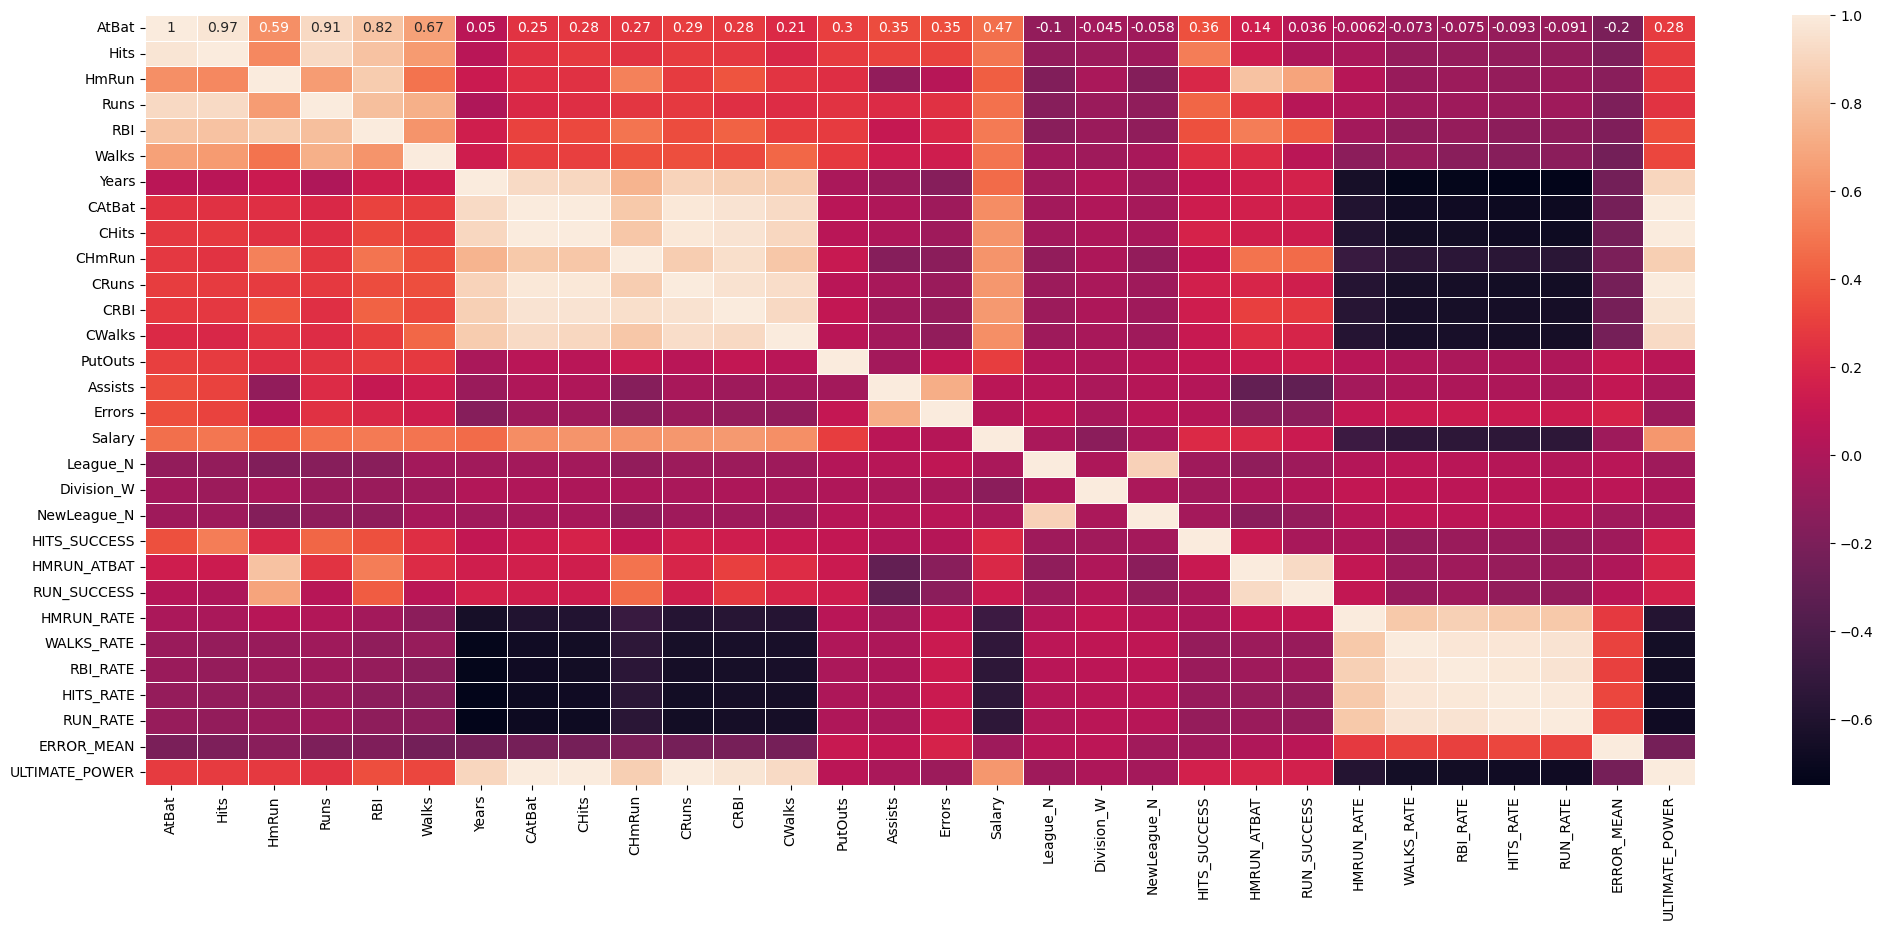

In [44]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<font color = '#F1C40F'>

<a id = "12"></a><br>
###  2.1.4.Standardization 
<a id="standardization_for_numerical_variables"></a>

We apply the standardization method for numerical variables in order to modelling

In [45]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,HITS_SUCCESS,HMRUN_ATBAT,RUN_SUCCESS,HMRUN_RATE,WALKS_RATE,RBI_RATE,HITS_RATE,RUN_RATE,ERROR_MEAN,ULTIMATE_POWER
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,...,0.225256,0.341297,0.033333,0.999990,0.999999,1.000000,1.000000,1.000000,142.857143,32.333333
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,...,0.257143,2.222222,0.291667,0.101449,0.104000,0.091787,0.097006,0.074766,2.666667,408.333333
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,...,0.271399,3.757829,0.272727,0.285714,0.288973,0.270677,0.284464,0.294643,5.323194,248.000000
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,204.0,...,0.284274,4.032258,0.307692,0.098039,0.104520,0.093079,0.089524,0.078502,0.847458,869.000000
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,...,0.271028,3.115265,0.256410,0.833333,0.909091,0.913043,0.861386,0.812500,12.121212,53.666667


In [46]:
num_cols = [col for col in num_cols if 'Salary' not in col]

ss = StandardScaler()

df1[num_cols] = ss.fit_transform(df1[num_cols])  # Gives same results with the above for loop

df1.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,HITS_SUCCESS,HMRUN_ATBAT,RUN_SUCCESS,HMRUN_RATE,WALKS_RATE,RBI_RATE,HITS_RATE,RUN_RATE,ERROR_MEAN,ULTIMATE_POWER
0,-0.574071,-0.755130,-1.129528,-0.805218,-0.728445,-1.147050,-1.317944,-1.043259,-1.035269,-0.955960,...,0.225256,0.341297,0.033333,0.999990,0.999999,1.000000,1.000000,1.000000,142.857143,32.333333
1,-0.430437,-0.431732,-0.434323,-1.036370,-0.383835,0.012751,1.345945,0.369158,0.203940,0.119170,...,0.257143,2.222222,0.291667,0.101449,0.104000,0.091787,0.097006,0.074766,2.666667,408.333333
2,0.640293,0.624699,0.840219,0.581693,0.918021,1.729256,-0.908115,-0.447592,-0.405190,0.024305,...,0.271399,3.757829,0.272727,0.285714,0.288973,0.270677,0.284464,0.294643,5.323194,248.000000
3,0.751283,0.861858,1.071954,0.543168,1.147761,-0.080033,0.731201,1.344334,1.396417,2.253619,...,0.284274,4.032258,0.307692,0.098039,0.104520,0.093079,0.089524,0.078502,0.847458,869.000000
4,-0.391264,-0.302373,-0.086721,-0.458490,-0.230676,-0.404778,-1.113030,-0.997163,-0.978868,-0.782042,...,0.271028,3.115265,0.256410,0.833333,0.909091,0.913043,0.861386,0.812500,12.121212,53.666667


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AtBat           322 non-null    float64
 1   Hits            322 non-null    float64
 2   HmRun           322 non-null    float64
 3   Runs            322 non-null    float64
 4   RBI             322 non-null    float64
 5   Walks           322 non-null    float64
 6   Years           322 non-null    float64
 7   CAtBat          322 non-null    float64
 8   CHits           322 non-null    float64
 9   CHmRun          322 non-null    float64
 10  CRuns           322 non-null    float64
 11  CRBI            322 non-null    float64
 12  CWalks          322 non-null    float64
 13  PutOuts         322 non-null    float64
 14  Assists         322 non-null    float64
 15  Errors          322 non-null    float64
 16  Salary          322 non-null    float64
 17  League_N        322 non-null    flo

![](https://www.festival-entrevues.com/sites/default/files/images/films/2017/moneyball_de_bennett_miller_6.jpg)

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#000099; color:white;"><strong>MODELING </strong></center></h1>
</div>

## 3.MODELING
<a id="modeling"></a>

### **Linear Regression**
<a id="linear_regression"></a>

In [49]:
df1.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,HITS_SUCCESS,HMRUN_ATBAT,RUN_SUCCESS,HMRUN_RATE,WALKS_RATE,RBI_RATE,HITS_RATE,RUN_RATE,ERROR_MEAN,ULTIMATE_POWER
0,-0.574071,-0.755130,-1.129528,-0.805218,-0.728445,-1.147050,-1.317944,-1.043259,-1.035269,-0.955960,...,0.225256,0.341297,0.033333,0.999990,0.999999,1.000000,1.000000,1.000000,142.857143,32.333333
1,-0.430437,-0.431732,-0.434323,-1.036370,-0.383835,0.012751,1.345945,0.369158,0.203940,0.119170,...,0.257143,2.222222,0.291667,0.101449,0.104000,0.091787,0.097006,0.074766,2.666667,408.333333
2,0.640293,0.624699,0.840219,0.581693,0.918021,1.729256,-0.908115,-0.447592,-0.405190,0.024305,...,0.271399,3.757829,0.272727,0.285714,0.288973,0.270677,0.284464,0.294643,5.323194,248.000000
3,0.751283,0.861858,1.071954,0.543168,1.147761,-0.080033,0.731201,1.344334,1.396417,2.253619,...,0.284274,4.032258,0.307692,0.098039,0.104520,0.093079,0.089524,0.078502,0.847458,869.000000
4,-0.391264,-0.302373,-0.086721,-0.458490,-0.230676,-0.404778,-1.113030,-0.997163,-0.978868,-0.782042,...,0.271028,3.115265,0.256410,0.833333,0.909091,0.913043,0.861386,0.812500,12.121212,53.666667


It's time to set the Linear Regression model to our dataset:

In [50]:
y=df1["Salary"]
X=df1.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


linreg = LinearRegression()
model = linreg.fit(X_train,y_train)

In [51]:
y_pred = model.predict(X_train)
lin_train_rmse =np.sqrt(mean_squared_error(y_train,y_pred))
print("LINEAR REGRESSION TRAIN RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train,y_pred))))

LINEAR REGRESSION TRAIN RMSE: 206.68


Please find below R-square value of the Train model. Accuracy of model for Train part:

In [52]:
lin_train_r2 = linreg.score(X_train,y_train)
print("LINEAR REGRESSION TRAIN R-SQUARED:", "{:,.3f}".format(linreg.score(X_train,y_train)))

LINEAR REGRESSION TRAIN R-SQUARED: 0.717


In [53]:
y_pred = model.predict(X_test)
lin_test_rmse =np.sqrt(mean_squared_error(y_test,y_pred))
print("LINEAR REGRESSION TEST RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

LINEAR REGRESSION TEST RMSE: 199.45


Please find below R-square value of the Test model. Accuracy of model for Test part:

In [54]:
lin_test_r2 = linreg.score(X_test,y_test)
print("LINEAR REGRESSION TEST R-SQUARED:", "{:,.3f}".format(linreg.score(X_test,y_test)))

LINEAR REGRESSION TEST R-SQUARED: 0.716


As you can see, our graphs are showing the R-square value for Test part at 0.716 level and with the accuracy of 199.45 RMSE.

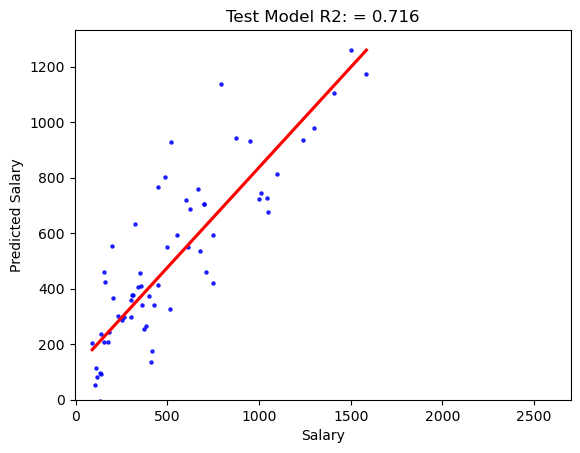

In [55]:
# Test part regplot:

g = sns.regplot(x=y_test, y=y_pred, scatter_kws={'color': 'b', 's': 5},
                ci=False, color="r")
g.set_title(f"Test Model R2: = {linreg.score(X_test, y_test):.3f}")
g.set_ylabel("Predicted Salary")
g.set_xlabel("Salary")
plt.xlim(-5, 2700)
plt.ylim(bottom=0)
plt.show()

Below, I have decided to use 10-fold cross model validation method:

In [56]:
print("LINEAR REGRESSION CROSS_VAL_SCORE:", "{:,.3f}".format(np.mean(np.sqrt(-cross_val_score(model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))))

LINEAR REGRESSION CROSS_VAL_SCORE: 229.793


## **Ridge Regression**
<a id="ridge_regression"></a>

It's time to set the Ridge Regression model to our dataset:

In [57]:
y=df1["Salary"]
X=df1.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


ridreg = Ridge()
model = ridreg.fit(X_train, y_train)


In [58]:
y_pred = model.predict(X_train)
ridge_train_rmse=np.sqrt(mean_squared_error(y_train,y_pred))
print("RIDGE REGRESSION TRAIN RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train,y_pred))))


RIDGE REGRESSION TRAIN RMSE: 210.19


Please find below R-square value of the Train model. Accuracy of model for Train part:

In [59]:
ridge_train_r2=ridreg.score(X_train,y_train)
print("RIDGE REGRESSION TRAIN R-SQUARED:", "{:,.3f}".format(ridreg.score(X_train,y_train)))

RIDGE REGRESSION TRAIN R-SQUARED: 0.707


In [60]:
y_pred = model.predict(X_test)
ridge_test_rmse =np.sqrt(mean_squared_error(y_test,y_pred))
print("RIDGE REGRESSION TEST RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

RIDGE REGRESSION TEST RMSE: 208.16


Please find below R-square value of the Test model. Accuracy of model for Test part:

In [61]:
ridge_test_r2 =ridreg.score(X_test,y_test)
print("RIDGE REGRESSION TEST R-SQUARED:", "{:,.3f}".format(ridreg.score(X_test,y_test)))

RIDGE REGRESSION TEST R-SQUARED: 0.691


In [62]:
print("RIDGE REGRESSION CROSS_VAL_SCORE:", "{:,.3f}".format(np.mean(np.sqrt(-cross_val_score(model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))))

RIDGE REGRESSION CROSS_VAL_SCORE: 225.749


**Model Parameter and Tuning**

In [64]:
y=df1["Salary"]
X=df1.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
ridreg_cv = RidgeCV(alphas = alpha, scoring = "neg_mean_squared_error", cv = 10)
ridreg_cv.fit(X_train, y_train)
ridreg_cv.alpha_

#Final Model 
ridreg_tuned = Ridge(alpha = ridreg_cv.alpha_).fit(X_train,y_train)
y_pred = ridreg_tuned.predict(X_test)

ridge_tuned_test_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RIDGE REGRESSION_TUNED TEST RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

RIDGE REGRESSION_TUNED TEST RMSE: 208.16


## **Lasso Regression**
<a id="lasso_regression"></a>

It's time to set the Lasso Regression model to our dataset:


In [65]:
y=df1["Salary"]
X=df1.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)


lasreg = Lasso()
model = lasreg.fit(X_train,y_train)

In [66]:
y_pred = model.predict(X_train)
lasso_train_rmse=np.sqrt(mean_squared_error(y_train,y_pred))
print("LASSO REGRESSION TRAIN RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train,y_pred))))

LASSO REGRESSION TRAIN RMSE: 210.51


In [67]:
lasso_train_r2 =lasreg.score(X_train,y_train)
print("LASSO REGRESSION TRAIN R-SQUARED:", "{:,.3f}".format(lasreg.score(X_train,y_train)))

LASSO REGRESSION TRAIN R-SQUARED: 0.706


In [68]:
y_pred = model.predict(X_test)
lasso_test_rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("LASSO REGRESSION TEST RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

LASSO REGRESSION TEST RMSE: 206.87


In [69]:
lasso_test_r2 = lasreg.score(X_test,y_test)
print("LASSO REGRESSION TEST R-SQUARED:", "{:,.3f}".format(lasreg.score(X_test,y_test)))

LASSO REGRESSION TEST R-SQUARED: 0.694


**Model Parameter and Tuning**

In [65]:
y=df1["Salary"]
X=df1.drop("Salary", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=46)

alpha = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
lasso_cv = LassoCV(alphas = alpha, cv = 10, normalize = True)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

#Final Model 
lasso_tuned = Lasso(alpha = lasso_cv.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)

lasso_tuned_test_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("LASSO REGRESSION_TUNED TEST RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

LASSO REGRESSION_TUNED TEST RMSE: 199.90


## **LightGBM - Light Gradient Boosting Model**
<a id="lightgbm_model"></a>

LightGBM is a gradient boosting framework that uses tree based learning algorithms.

It's time to set the LGBM model to our dataset:


In [79]:
from sklearn.model_selection import train_test_split

y=df1["Salary"]
X=df1.drop("Salary", axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42)

lgb_model = LGBMRegressor(verbose=-1).fit(X_train, y_train)
# Train Error
y_pred = lgb_model.predict(X_train)

# Test Error
y_pred1 = lgb_model.predict(X_test)
lightgbm_train_rmse =np.sqrt(mean_squared_error(y_train, y_pred))
lightgbm_test_rmse=np.sqrt(mean_squared_error(y_test, y_pred1))
lightgbm_train_r2 = r2_score(y_train, y_pred)
lightgbm_test_r2 = r2_score(y_test, y_pred1)

print("LGBM Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred))), "\n")
print("LGBM Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred1))),"\n")
print("LGBM Train R2:", "{:,.2f}".format(r2_score(y_train, y_pred)),"\n")
print("LGBM Test R2:", "{:,.2f}".format(r2_score(y_test, y_pred1)))


LGBM Train RMSE: 88.69 

LGBM Test RMSE: 228.81 

LGBM Train R2: 0.94 

LGBM Test R2: 0.69


**Model Parameters**

In [80]:
# Parameters
lgb_model = LGBMRegressor()

lgb_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [500, 1000],
               "max_depth": [3, 5, 8],
               "colsample_bytree": [1, 0.8, 0.5]}

# CV
lgb_cv_model = GridSearchCV(lgb_model,
                             lgb_params,
                             cv=5,
                             n_jobs=-1,
                             verbose=2).fit(X_train, y_train)

lgb_cv_model.best_params_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 225, number of used features: 29
[LightGBM] [Info] Start training from score 488.944053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

{'colsample_bytree': 1,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 500}

**Model Hyperparameter Tuning**

In [81]:
# LGB TUNED
lgb_tuned = LGBMRegressor(**lgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgb_tuned.predict(X_test)

lightgbm_tuned_test_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
lightgbm_tuned_test_r2 = r2_score(y_test, y_pred)


print("")
print("LightGBM_Tuned Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))),"\n")
print("LightGBM_Tuned Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred)), "\n")
print("LightGBM_Tuned Test R^2:", "{:,.2f}".format(r2_score(y_test, y_pred)))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000552 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 225, number of used features: 29
[LightGBM] [Info] Start training from score 488.944053
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

**Feature Importance for LightGBM Model**

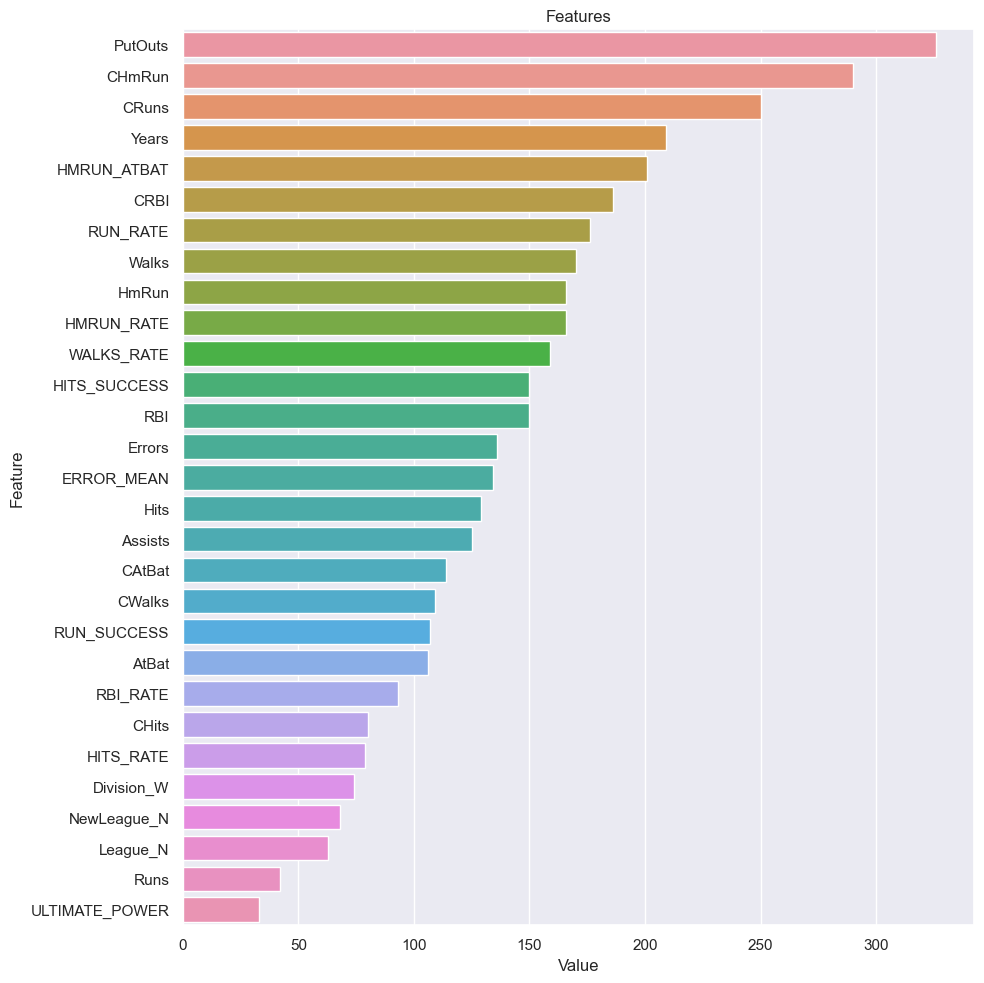

In [82]:
# Faeture Importance
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(lgb_tuned, X_test)

## **Random Forest Model**
<a id="random_forest_model"></a>

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [83]:
from sklearn.model_selection import train_test_split

y=df1["Salary"]
X=df1.drop("Salary", axis=1)

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.30,random_state=42)


rf_model = RandomForestRegressor().fit(X_train, y_train)

# Train Error
y_pred = rf_model.predict(X_train)

# Test Error
y_pred1= rf_model.predict(X_test)

rf_train_rmse =np.sqrt(mean_squared_error(y_train, y_pred))
rf_test_rmse=np.sqrt(mean_squared_error(y_test, y_pred1))
rf_train_r2 = r2_score(y_train, y_pred)
rf_test_r2 = r2_score(y_test, y_pred1)

print("RF Train RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred))))
print("RF Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred1))),"\n")
print("RF Train MAE:", "{:,.2f}".format(mean_absolute_error(y_train, y_pred)))
print("RF Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred1)), "\n")
print("RF Train R^2:", "{:,.2f}".format(r2_score(y_train, y_pred)))
print("RF Test R^2:", "{:,.2f}".format(r2_score(y_test, y_pred1)))

RF Train RMSE: 87.01
RF Test RMSE: 239.88 

RF Train MAE: 55.32
RF Test MAE: 156.81 

RF Train R^2: 0.95
RF Test R^2: 0.66


**Model Parameters**

In [84]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 15],
             "n_estimators": [200, 500],
             "min_samples_split": [2, 5, 8]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=1).fit(X_train, y_train)
rf_cv_model.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 200}

**Model Tuning**

In [85]:
# RF TUNED
rf_tuned = RandomForestRegressor(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)

rf_tuned_test_rmse =np.sqrt(mean_squared_error(y_test, y_pred))
rf_tuned_test_r2 = r2_score(y_test, y_pred)

print("RF_TUNED Test RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))),"\n")
print("RF_TUNED Test MAE:", "{:,.2f}".format(mean_absolute_error(y_test, y_pred)), "\n")
print("RF_TUNED Test R^2:", "{:,.2f}".format(r2_score(y_test, y_pred)))

RF_TUNED Test RMSE: 242.50 

RF_TUNED Test MAE: 158.12 

RF_TUNED Test R^2: 0.65


**Feature Importance for RF Model**

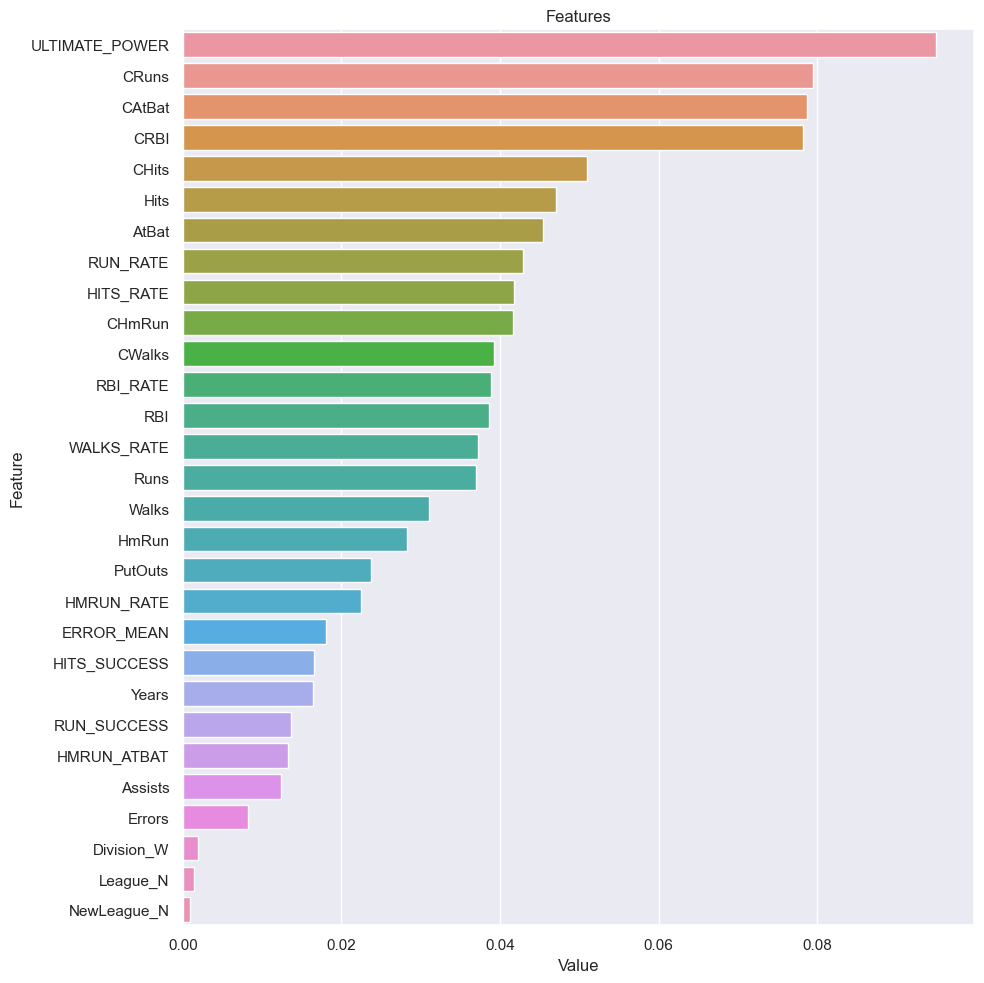

In [86]:
# Feature Importance

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_tuned, X_test)

![](https://amessagewithabottle.com/wp-content/uploads/2019/09/moneyball-1024x550.jpg)

<a id='ldata'></a>
 <a id = "15"></a><br>

<div>  
<h1><center style="background-color:#000099; color:white;"><strong>SUMMARY & RESULTS </strong></center></h1>
</div>

The work done is as follows:
> •	Imported Libraries and Read Hitters Dataset

> •	Explorary Data Analysis : We checked the missing values and we defined a function to grab the categorical and numerical variables of its dataset. We made the target variable analysis and outliers analysis.

>•	Data Preprocessing : We filled missing values of some variables with median values or the knn method.

>•	Featured Engineering: We created new feature interactions for categorical variables.

>•	Encoding: One-Hot-Encoding was implemented for categorical variables.

>•	Modeling: We created ML model for the dataset. The accuracy score was calculated the machine learning models that are Linear Regression, Lasso Regression, LightGBM and Random Forest Models.

>•	Model Parameter and Tuning


Thank you for your suggestions and comments :)



In [88]:
results_model_train_test = pd.DataFrame({"ERRORS":["TRAIN RMSE","TRAIN R2","TEST RMSE","TEST R2"],
                              "LINEAR":[lin_train_rmse,lin_train_r2,lin_test_rmse,lin_test_r2],
                               "RIDGE":[ridge_train_rmse,ridge_train_r2,ridge_test_rmse,ridge_test_r2],
                              #"RIDGE TUNED":["-","-",ridge_tuned_test_rmse,"-"],
                              "LASSO":[lasso_train_rmse,lasso_train_r2,lasso_test_rmse,lasso_test_r2],
                              #"LASSO TUNED":["-","",lasso_tuned_test_rmse,""],                              
                              "LIGHTGBM":[lightgbm_train_rmse,lightgbm_train_r2,lightgbm_test_rmse,lightgbm_test_r2],
                              "LIGHTGBM TUNED":["-","-",lightgbm_tuned_test_rmse,lightgbm_tuned_test_r2],
                              "RANDOM FOREST":[rf_train_rmse,rf_train_r2,rf_test_rmse,rf_test_r2],
                              "RANDOM FOREST TUNED":["-","-",rf_tuned_test_rmse,rf_tuned_test_r2]
                                         })
results_model_train_test

,ERRORS,LINEAR,RIDGE,LASSO,LIGHTGBM,LIGHTGBM TUNED,RANDOM FOREST,RANDOM FOREST TUNED
0,TRAIN RMSE,206.677427,210.194087,210.512123,88.688188,-,87.010470,-
1,TRAIN R2,0.717046,0.707335,0.706448,0.943756,-,0.945864,-
2,TEST RMSE,199.452475,208.160439,206.866327,228.805403,229.977195,239.884527,242.503971
3,TEST R2,0.716003,0.690663,0.694497,0.690213,0.687032,0.659486,0.652009
